In [ ]:
##!pip install districtdatalabs yellowbrick

In [1]:
conda install -c districtdatalabs yellowbrick

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ifeyi\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.3.11  |       haa95532_0         128 KB
    ------------------------------------------------------------
                                           Total:         128 KB

The following packages will be UPDATED:

  ca-certificates                     2023.12.12-haa95532_0 --> 2024.3.11-haa95532_0 




ca-certificates-2024 | 128 KB    |            |   0% 
ca-certificates-2024 | 128 KB    | #2         |  12% 
ca-certificates-2024 | 128 KB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...workin



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0




In [2]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [6]:
#load dataset
data =pd.read_csv(r"C:\Users\ifeyi\Downloads\marketing_campaign - marketing_campaign.csv")
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
#assesing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## observations
    There are missing values in income
    Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

In [8]:
#drop missing values
data.dropna(inplace=True)

In [9]:
# check for duplicates
print(data.duplicated().sum())

0


In [10]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [11]:
#changing the date dtype to datetime object
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"],format='mixed')

In [12]:
type(data["Dt_Customer"][0])

pandas._libs.tslibs.timestamps.Timestamp

## feature engineering
    Creating new features; "Customer_For","Age" and " is Parent" and "total spent"
    modifying existing features; "education",
    renmaing some features for more clarity
    dropped off more redundant features

In [13]:
#Created a feature "Customer_For"
#of the number of days the customers started to shop in the store relative to the last recorded date
days = []
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

d1 = max(dates)# taking it the newest customer
for x in dates:
    delta = d1 - x
    days.append(delta)

data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"])


In [14]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [15]:
#explore the material status and the education level features
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [17]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [18]:
#Feature Engineering
#Age of customer today
data["Age"]= 2021 - data['Year_Birth'] 

#Total spendings on various items
data["Spent_Amt"] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
    

#Deriving living situation by marital status"Alone"
data["Living_With"] = data['Marital_Status'].replace({"Married":"Partner","Together":"Partner","Single":"Alone","Divorced":"Alone","Widow":"Alone","Alone":"Alone","Absurd":"Alone","YOLO":"0"})
   
#Feature indicating total children living in the household
data["Children"] = data["Kidhome"] + data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = pd.to_numeric(data["Living_With"].replace({"Partner":2,"Alone":1})) + data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children > 0,1,0)

#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({"Graduation":"Graduate","PhD":"PhD","Master":"PostGraduate","2n Cycle":"PostGraduate","Basic":"Undergraduate"})

#For clarity
data=data.rename(columns={'MntWines':"Wines", 'MntFruits':'Fruits',
       'MntMeatProducts':'MeatProducts','MntFishProducts':"FishProducts",'MntSweetProducts':"SweetProducts",
       'MntGoldProds':'GoldProds'})

#Dropping some of the redundant features
to_drop = ['Year_Birth','Marital_Status',"Kidhome","Teenhome",'Z_CostContact', 'Z_Revenue','Dt_Customer','ID']
data = data.drop(to_drop,axis = 1)

In [19]:
data

Education   Income  Recency  Wines  Fruits  MeatProducts  \
0         Graduate  58138.0       58    635      88           546   
1         Graduate  46344.0       38     11       1             6   
2         Graduate  71613.0       26    426      49           127   
3         Graduate  26646.0       26     11       4            20   
4              PhD  58293.0       94    173      43           118   
...            ...      ...      ...    ...     ...           ...   
2235      Graduate  61223.0       46    709      43           182   
2236           PhD  64014.0       56    406       0            30   
2237      Graduate  56981.0       91    908      48           217   
2238  PostGraduate  69245.0        8    428      30           214   
2239           PhD  52869.0       40     84       3            61   

      FishProducts  SweetProducts  GoldProds  NumDealsPurchases  ...  \
0              172             88         88                  3  ...   
1                2              1          6                  2  ...   
2              111             21         42                  1  ...   
3               10              3          5                  2  ...   
4               46             27         15                  5  ...   
...            ...            ...        ...                ...  ...   
2235            42            118        247                  2  ...   
2236             0              0          8                  7  ...   
2237            32             12         24                  1  ...   
2238            80             30         61                  2  ...   
2239             2              1         21                  3  ...   

      AcceptedCmp2  Complain  Response       Customer_For  Age  Spent_Amt  \
0                0         0         1  83894400000000000   64       1617   
1                0         0         0  10800000000000000   67         27   
2                0         0         0  40780800000000000   56        776   
3                0         0         0   5616000000000000   37         53   
4                0         0         0  27734400000000000   40        422   
...            ...       ...       ...                ...  ...        ...   
2235             0         0         0  46742400000000000   54       1341   
2236             0         0         0   5270400000000000   75        444   
2237             0         0         0  27216000000000000   40       1241   
2238             0         0         0  27302400000000000   65        843   
2239             0         0         1  67564800000000000   67        172   

      Living_With  Children  Family_Size  Is_Parent  
0           Alone         0            1          0  
1           Alone         2            3          1  
2         Partner         0            2          0  
3         Partner         1            3          1  
4         Partner         1            3          1  
...           ...       ...          ...        ...  
2235      Partner         1            3          1  
2236      Partner         3            5          1  
2237        Alone         0            1          0  
2238      Partner         1            3          1  
2239      Partner         2            4          1  

[2216 rows x 28 columns]

## EXPLORATORY DATA ANALYSIS
    multivariate exploration to explore features relationships

In [20]:
#check descriptive statisitc
data.describe().T

count          mean           std     min           25%  \
Income               2216.0  5.224725e+04  2.517308e+04  1730.0  3.530300e+04   
Recency              2216.0  4.901264e+01  2.894835e+01     0.0  2.400000e+01   
Wines                2216.0  3.050916e+02  3.373279e+02     0.0  2.400000e+01   
Fruits               2216.0  2.635605e+01  3.979392e+01     0.0  2.000000e+00   
MeatProducts         2216.0  1.669959e+02  2.242833e+02     0.0  1.600000e+01   
FishProducts         2216.0  3.763764e+01  5.475208e+01     0.0  3.000000e+00   
SweetProducts        2216.0  2.702888e+01  4.107205e+01     0.0  1.000000e+00   
GoldProds            2216.0  4.396525e+01  5.181541e+01     0.0  9.000000e+00   
NumDealsPurchases    2216.0  2.323556e+00  1.923716e+00     0.0  1.000000e+00   
NumWebPurchases      2216.0  4.085289e+00  2.740951e+00     0.0  2.000000e+00   
NumCatalogPurchases  2216.0  2.671029e+00  2.926734e+00     0.0  0.000000e+00   
NumStorePurchases    2216.0  5.800993e+00  3.250785e+00     0.0  3.000000e+00   
NumWebVisitsMonth    2216.0  5.319043e+00  2.425359e+00     0.0  3.000000e+00   
AcceptedCmp3         2216.0  7.355596e-02  2.611058e-01     0.0  0.000000e+00   
AcceptedCmp4         2216.0  7.400722e-02  2.618417e-01     0.0  0.000000e+00   
AcceptedCmp5         2216.0  7.310469e-02  2.603670e-01     0.0  0.000000e+00   
AcceptedCmp1         2216.0  6.407942e-02  2.449496e-01     0.0  0.000000e+00   
AcceptedCmp2         2216.0  1.353791e-02  1.155883e-01     0.0  0.000000e+00   
Complain             2216.0  9.476534e-03  9.690700e-02     0.0  0.000000e+00   
Response             2216.0  1.502708e-01  3.574173e-01     0.0  0.000000e+00   
Customer_For         2216.0  4.423735e+16  2.008532e+16     0.0  2.937600e+16   
Age                  2216.0  5.217960e+01  1.198555e+01    25.0  4.400000e+01   
Spent_Amt            2216.0  6.070754e+02  6.029005e+02     5.0  6.900000e+01   
Children             2216.0  9.472022e-01  7.490619e-01     0.0  0.000000e+00   
Family_Size          2216.0  2.591606e+00  9.068099e-01     1.0  2.000000e+00   
Is_Parent            2216.0  7.143502e-01  4.518253e-01     0.0  0.000000e+00   

                              50%           75%           max  
Income               5.138150e+04  6.852200e+04  6.666660e+05  
Recency              4.900000e+01  7.400000e+01  9.900000e+01  
Wines                1.745000e+02  5.050000e+02  1.493000e+03  
Fruits               8.000000e+00  3.300000e+01  1.990000e+02  
MeatProducts         6.800000e+01  2.322500e+02  1.725000e+03  
FishProducts         1.200000e+01  5.000000e+01  2.590000e+02  
SweetProducts        8.000000e+00  3.300000e+01  2.620000e+02  
GoldProds            2.450000e+01  5.600000e+01  3.210000e+02  
NumDealsPurchases    2.000000e+00  3.000000e+00  1.500000e+01  
NumWebPurchases      4.000000e+00  6.000000e+00  2.700000e+01  
NumCatalogPurchases  2.000000e+00  4.000000e+00  2.800000e+01  
NumStorePurchases    5.000000e+00  8.000000e+00  1.300000e+01  
NumWebVisitsMonth    6.000000e+00  7.000000e+00  2.000000e+01  
AcceptedCmp3         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp4         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp5         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp1         0.000000e+00  0.000000e+00  1.000000e+00  
AcceptedCmp2         0.000000e+00  0.000000e+00  1.000000e+00  
Complain             0.000000e+00  0.000000e+00  1.000000e+00  
Response             0.000000e+00  0.000000e+00  1.000000e+00  
Customer_For         4.432320e+16  5.927040e+16  9.184320e+16  
Age                  5.100000e+01  6.200000e+01  1.280000e+02  
Spent_Amt            3.965000e+02  1.048000e+03  2.525000e+03  
Children             1.000000e+00  1.000000e+00  3.000000e+00  
Family_Size          3.000000e+00  3.000000e+00  5.000000e+00  
Is_Parent            1.000000e+00  1.000000e+00  1.000000e+00

In [21]:
data.describe(include=(bool,object))

Education Living_With
count       2216        2216
unique         4           3
top     Graduate     Partner
freq        1116        1430

In [22]:
print(data.isnull().sum())

Education              0
Income                 0
Recency                0
Wines                  0
Fruits                 0
MeatProducts           0
FishProducts           0
SweetProducts          0
GoldProds              0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_For           0
Age                    0
Spent_Amt              0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64


<Axes: >

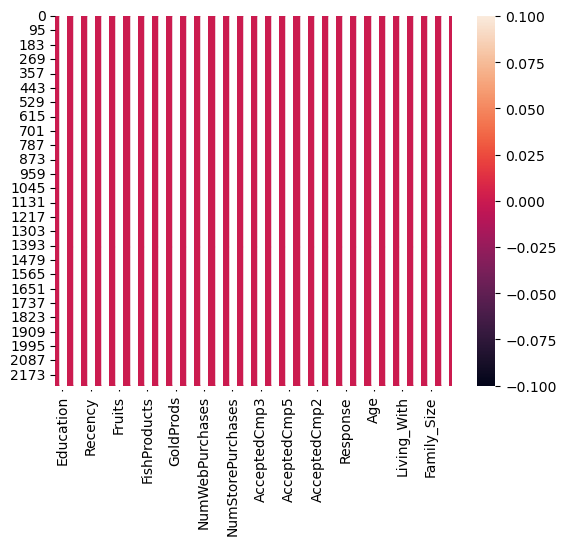

In [23]:
### visualizing the missing values
sns.heatmap(data.isnull(),annot=True,fmt="g")

In [24]:
data1 = data.copy(deep=True)

In [25]:
data1.columns

Index(['Education', 'Income', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent_Amt', 'Living_With', 'Children', 'Family_Size',
       'Is_Parent'],
      dtype='object')

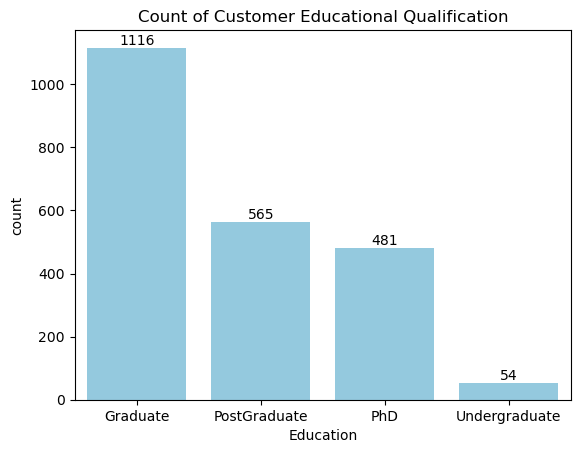

In [26]:

# UNIVARIATE ANALYSIS FOR CUSTOMERS EDUCATIONAL QUALIFICATION 

ax = sns.countplot(x='Education', data=data1, order=data1['Education'].value_counts().index, color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer Educational Qualification")
plt.show()


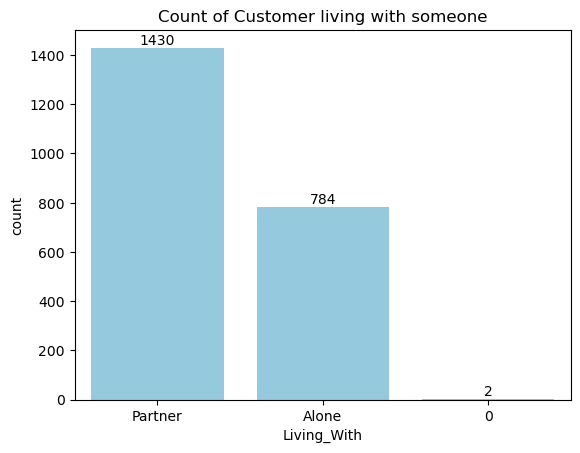

In [27]:
# UNIVARIATE ANALYSIS FOR CUSTOMERS LIVING WITH SOMEONE

ax = sns.countplot(x='Living_With', data=data1, order=data1['Living_With'].value_counts().index, color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer living with someone")
plt.show()


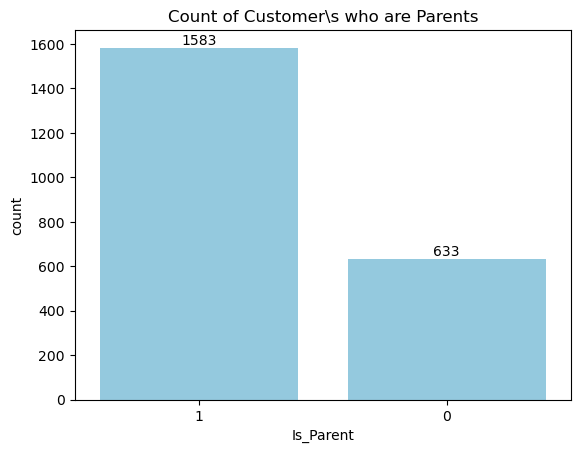

In [28]:
# UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ARE PARENTS

ax = sns.countplot(x='Is_Parent', data=data1, order=data1["Is_Parent"].value_counts().index, color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer\s who are Parents")
plt.show()


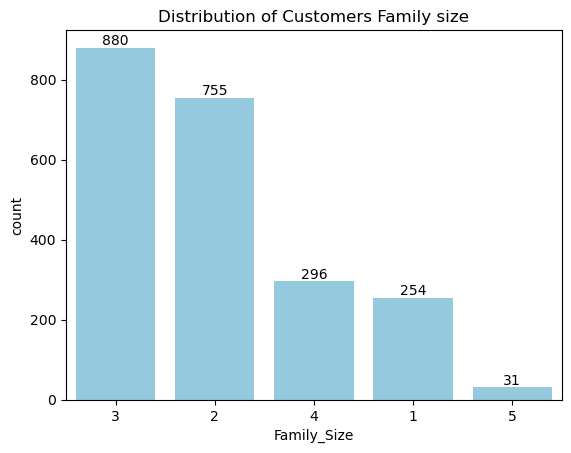

In [29]:
# UNIVARIATE ANALYSIS FOR CUSTOMERS FAMILY SIZE

ax = sns.countplot(x='Family_Size', data=data1, order=data1["Family_Size"].value_counts().index, color='skyblue')
ax.bar_label(ax.containers[0])
plt.title("Distribution of Customers Family size")
plt.show()


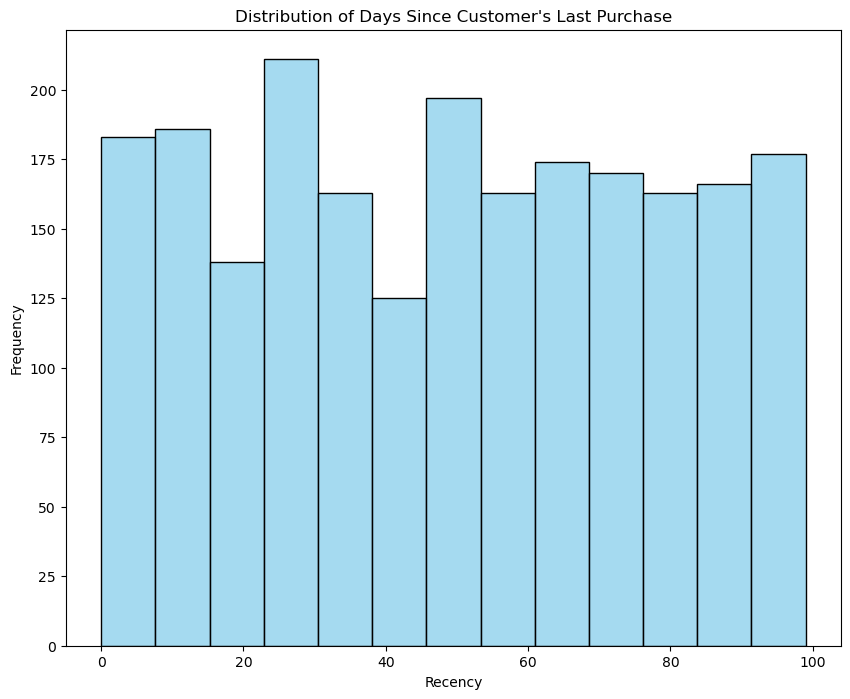

In [30]:
# UNIVARIATE ANALYSIS FOR DISTRIBUTION OF DAYS SINCE THE CUSTOMERS LAST PURCHASE
plt.figure(figsize =(10,8))
sns.histplot(x='Recency', data=data1, color='skyblue')
plt.title("Distribution of Days Since Customer\'s Last Purchase")
plt.ylabel("Frequency")
plt.show()


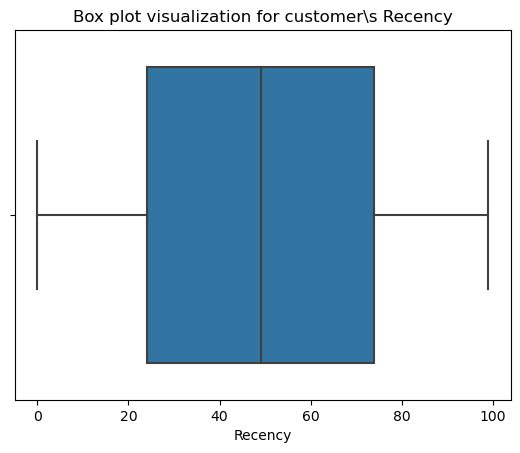

In [31]:
# UNIVARIATE ANALYSIS FOR CUSTOMER Recency
sns.boxplot(x="Recency",data=data1)
plt.title("Box plot visualization for customer\s Recency")
plt.show()

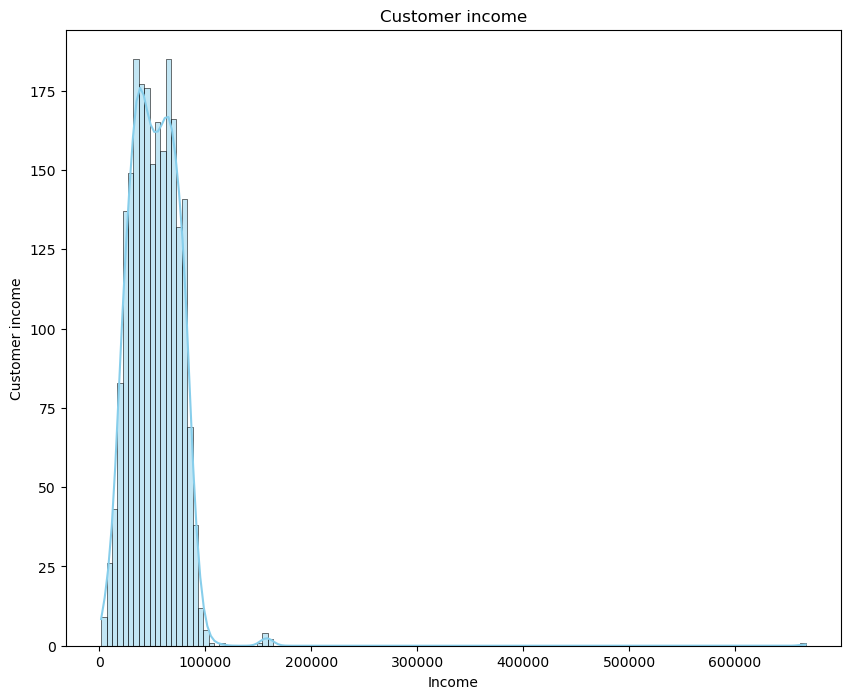

In [32]:
# UNIVARIATE ANALYSIS FOR CUSTOMER INCOME 


plt.figure(figsize =(10,8))
sns.histplot(x='Income', data=data1,kde=True, color='skyblue')
plt.title("Customer income")
plt.ylabel("Customer income")
plt.show()

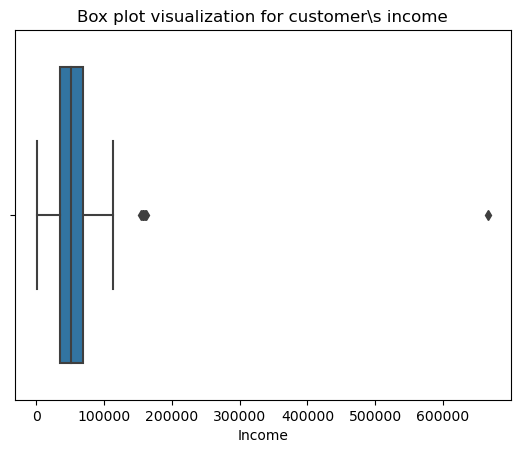

In [33]:
# UNIVARIATE DISTRIBUTION OF CUSTOMER INCOME 
sns.boxplot(x="Income",data=data1)
plt.title("Box plot visualization for customer\s income")
plt.show()

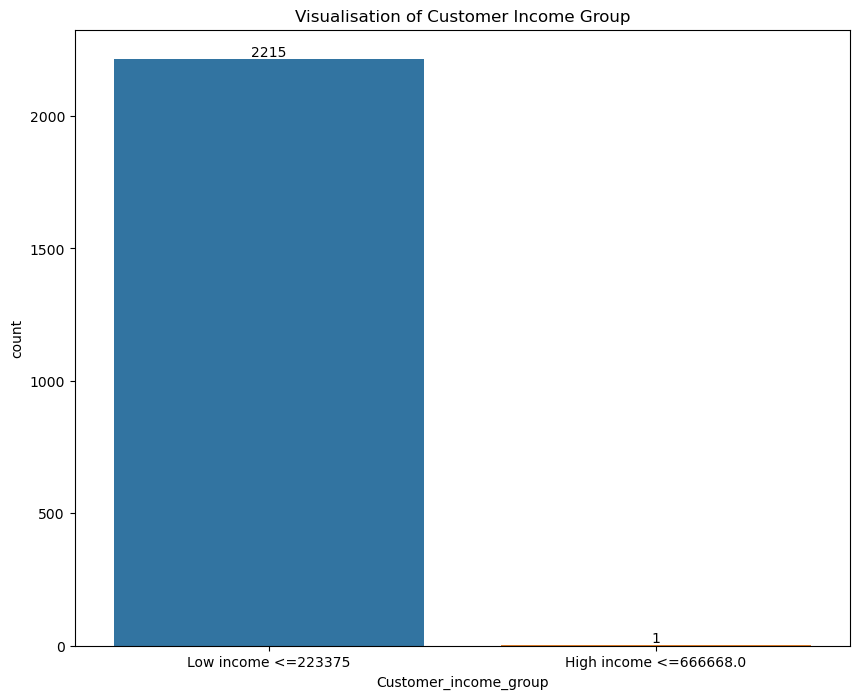

In [34]:
#UNIVARIATE ANALYSIS FOR CUSTOMER INCOME GROUP

def customer_income(income):
    if income <=223375:
        return "Low income <=223375"
    elif 223375 < income <= 445021.7:
        return "Middle income <=445021.7"
    else:
        return "High income <=666668.0"

data1["Customer_income_group"]=data1["Income"].apply(customer_income)

plt.figure(figsize=(10,8))

ax=sns.countplot(x="Customer_income_group",data=data1,order=data1["Customer_income_group"].value_counts().index)

ax.bar_label(ax.containers[0])

plt.title("Visualisation of Customer Income Group")

plt.show()


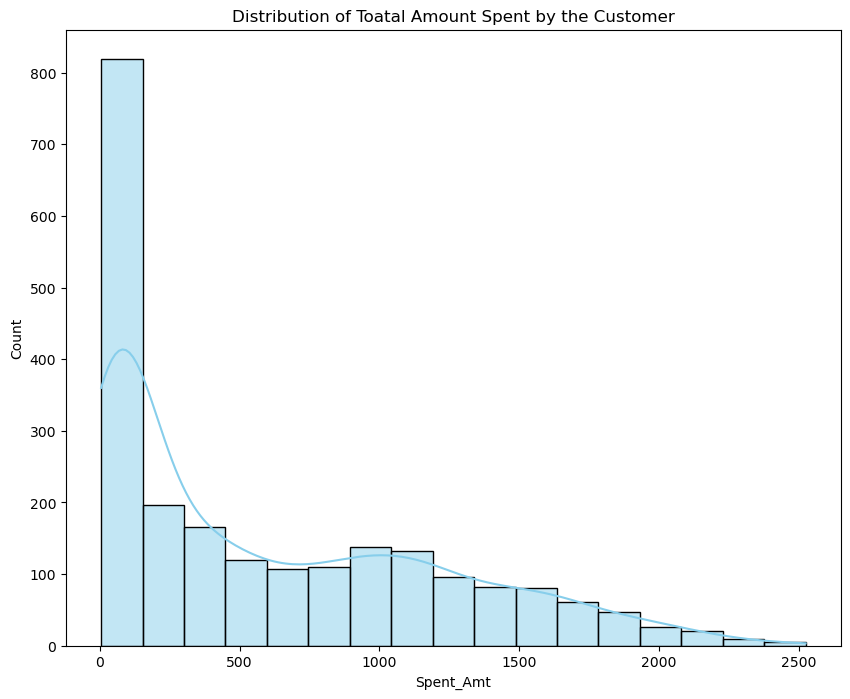

In [35]:
# UNIVARIATE ANALYSIS FOR DISTRIBUTION OF DAYS SINCE THE CUSTOMERS LAST PURCHASE
plt.figure(figsize =(10,8))
sns.histplot(x='Spent_Amt', data=data1,kde=True, color='skyblue')
plt.title("Distribution of Toatal Amount Spent by the Customer")
plt.show()


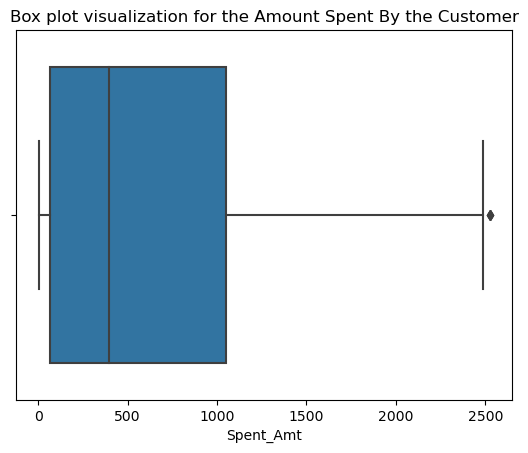

In [36]:
# UNIVARIATE DISTRIBUTION OF CUSTOMER INCOME 
sns.boxplot(x="Spent_Amt",data=data1)
plt.title("Box plot visualization for the Amount Spent By the Customer")
plt.show()

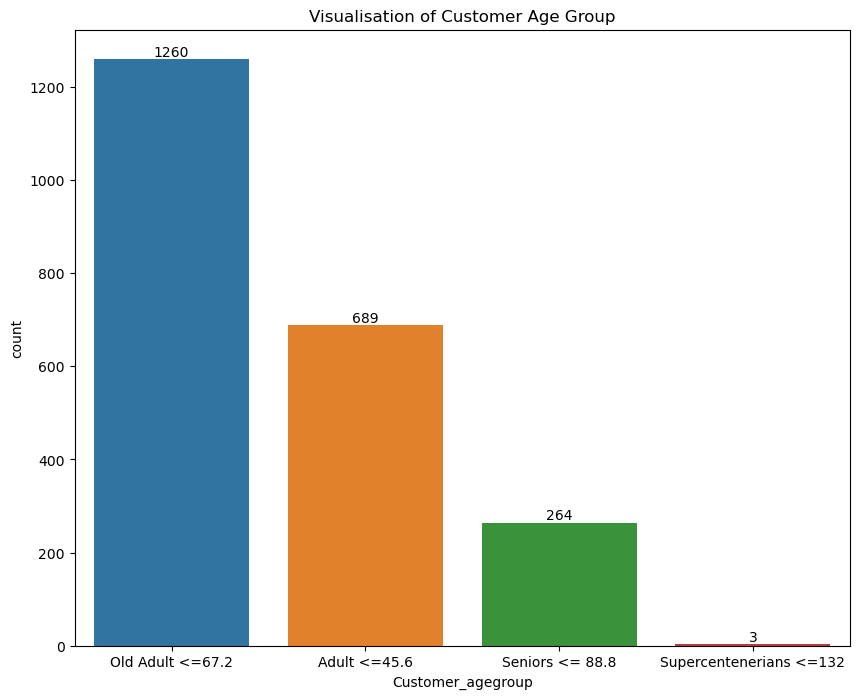

In [37]:
def customer_agegroup(Age):
    if Age <= 45.6:
        return "Adult <=45.6"
    elif Age <= 67.2:
        return "Old Adult <=67.2"
    elif Age <= 88.8:
        return "Seniors <= 88.8"
    elif Age <= 110.4:
        return "Centenarians <=110.4"
    else:
        return "Supercentenerians <=132"

data1["Customer_agegroup"]=data1["Age"].apply(customer_agegroup)

plt.figure(figsize=(10,8))

ax=sns.countplot(x="Customer_agegroup",data=data1,order=data1["Customer_agegroup"].value_counts().index)

ax.bar_label(ax.containers[0])

plt.title("Visualisation of Customer Age Group")

plt.show()


In [38]:
data1.columns

Index(['Education', 'Income', 'Recency', 'Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts', 'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent_Amt', 'Living_With', 'Children', 'Family_Size',
       'Is_Parent', 'Customer_income_group', 'Customer_agegroup'],
      dtype='object')

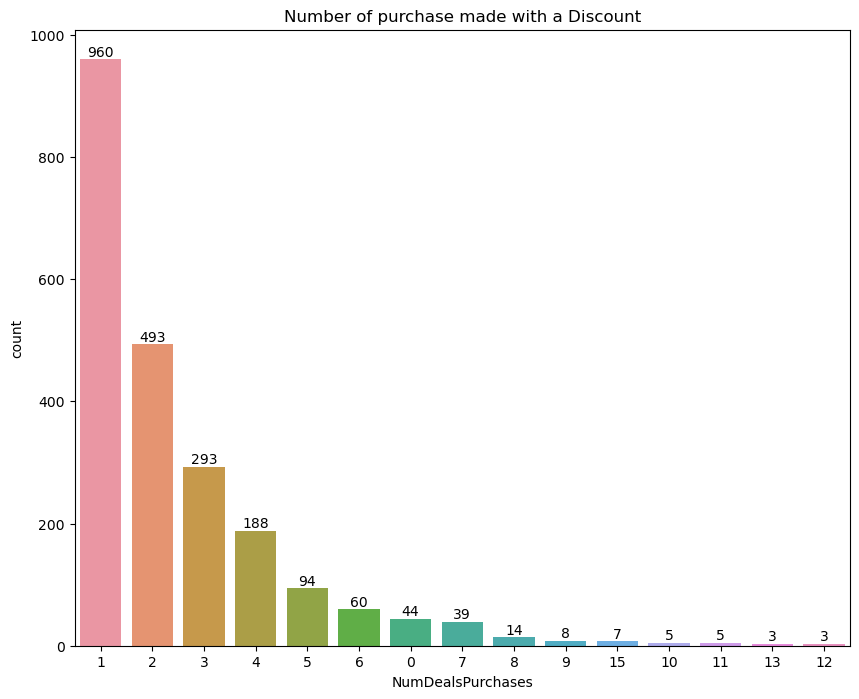

In [39]:
#UNIVARIATE ANALYSIS FOR NUMBER OF PURCHASE MADE WITH A DISCOUNT
plt.figure(figsize=(10,8))
ax=sns.countplot(x='NumDealsPurchases',data=data1,order=data1['NumDealsPurchases'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Number of purchase made with a Discount")
plt.show()

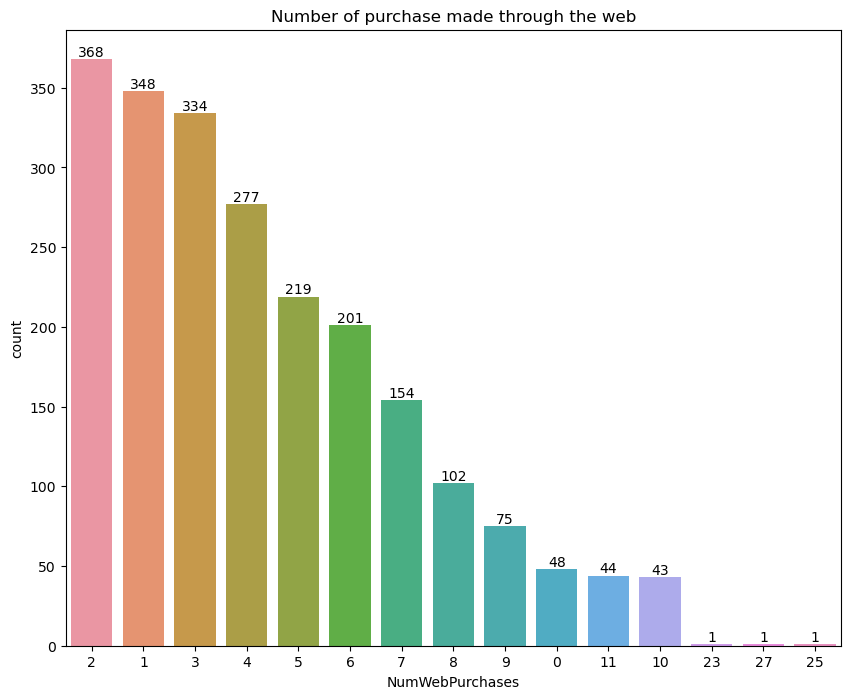

In [40]:
#UNIVARIATE ANALYSIS FOR NUMBER OF PURCHASE MADE THROUGH THE WEB
plt.figure(figsize=(10,8))
ax=sns.countplot(x='NumWebPurchases',data=data1,order=data1['NumWebPurchases'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Number of purchase made through the web")
plt.show()

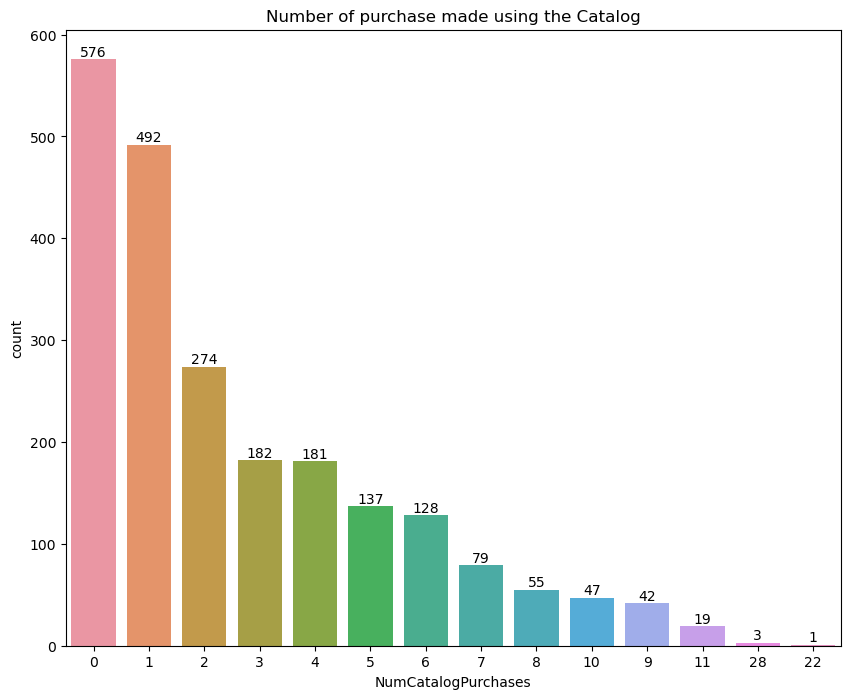

In [41]:
#UNIVARIATE ANALYSIS FOR NUMBER OF PURCHASE MADE USING A CATALOG
plt.figure(figsize=(10,8))
ax=sns.countplot(x='NumCatalogPurchases',data=data1,order=data1['NumCatalogPurchases'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Number of purchase made using the Catalog")
plt.show()

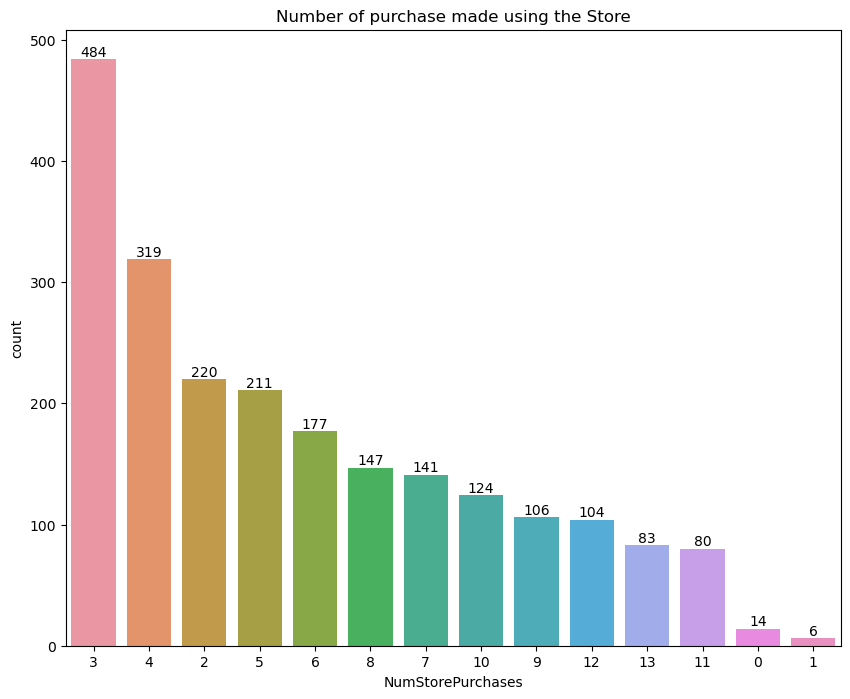

In [43]:
#UNIVARIATE ANALYSIS FOR NUMBER OF PURCHASE MADE USING THE STORE
plt.figure(figsize=(10,8))
ax=sns.countplot(x='NumStorePurchases',data=data1,order=data1['NumStorePurchases'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Number of purchase made using the Store")
plt.show()

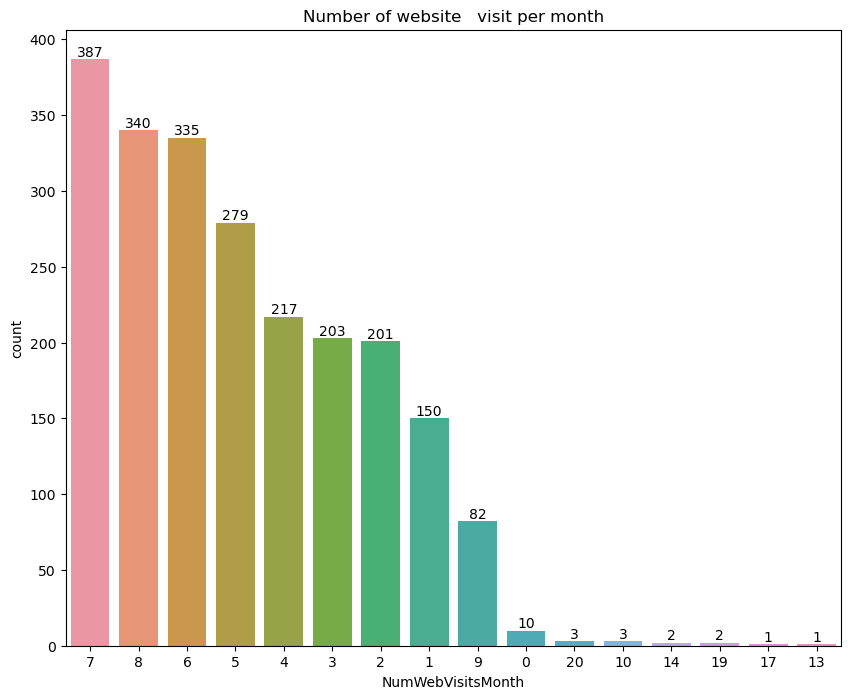

In [44]:
#UNIVARIATE ANALYSIS FOR NUMBER OF WEBSITE VISIT PER MONTH
plt.figure(figsize=(10,8))
ax=sns.countplot(x='NumWebVisitsMonth',data=data1,order=data1['NumWebVisitsMonth'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Number of website   visit per month")
plt.show()

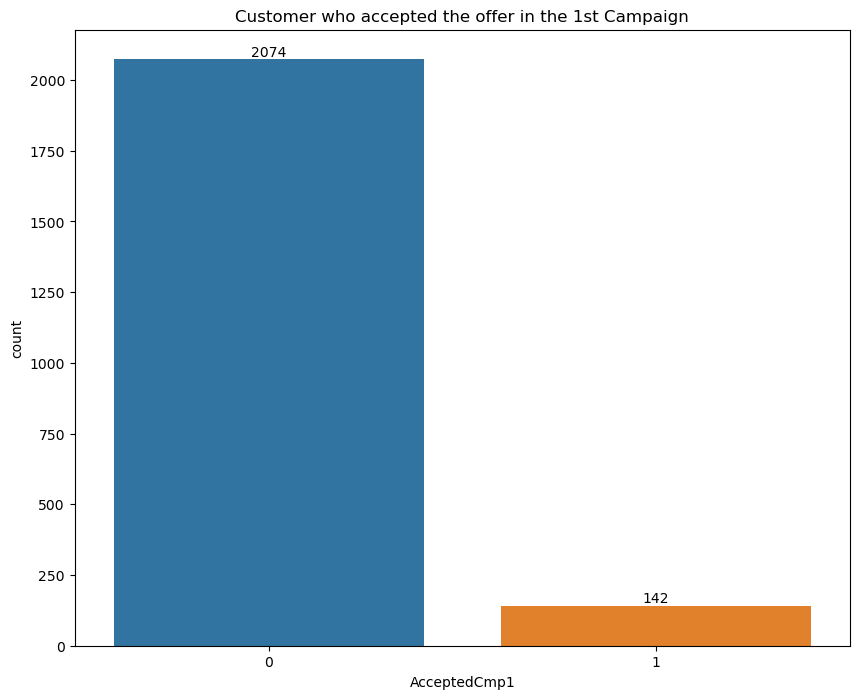

In [45]:
#UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ACCEPTED THE OFFER IN THE 1ST CAMPAIGN
plt.figure(figsize=(10,8))
ax=sns.countplot(x='AcceptedCmp1',data=data1,order=data1['AcceptedCmp1'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Customer who accepted the offer in the 1st Campaign")

plt.show()

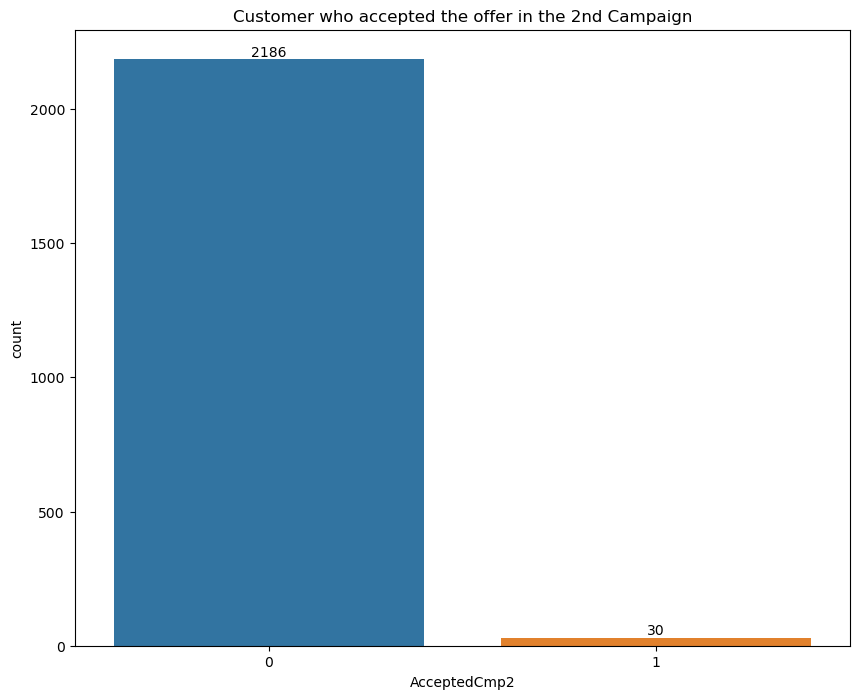

In [46]:
#UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ACCEPTED THE OFFER IN THE 2ND CAMPAIGN
plt.figure(figsize=(10,8))
ax=sns.countplot(x='AcceptedCmp2',data=data1,order=data1['AcceptedCmp2'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Customer who accepted the offer in the 2nd Campaign")

plt.show()

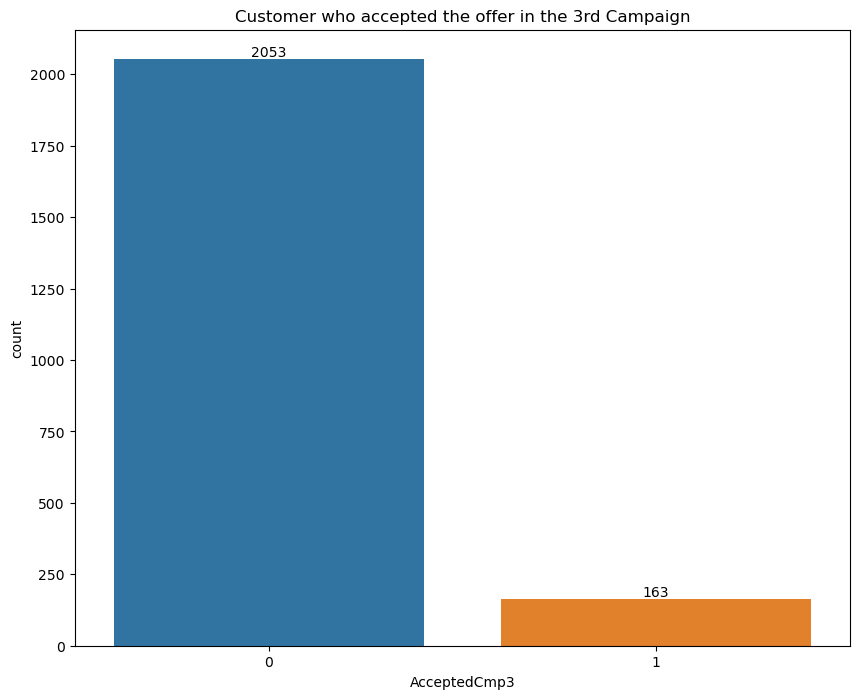

In [47]:
#UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ACCEPTED THE OFFER IN THE 3RD CAMPAIGN
plt.figure(figsize=(10,8))
ax=sns.countplot(x='AcceptedCmp3',data=data1,order=data1['AcceptedCmp3'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Customer who accepted the offer in the 3rd Campaign")

plt.show()

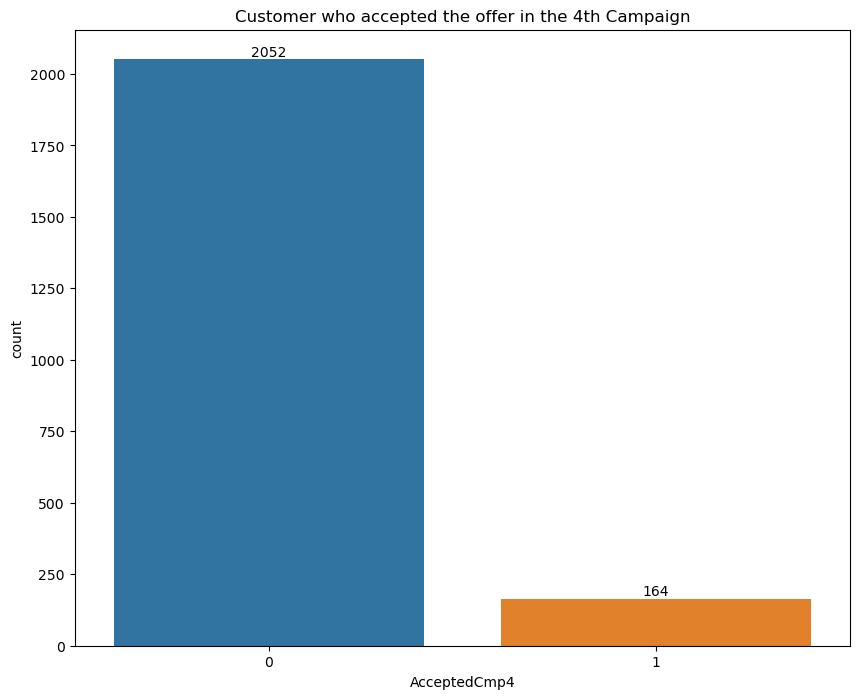

In [48]:
#UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ACCEPTED THE OFFER IN THE 4Th CAMPAIGN
plt.figure(figsize=(10,8))
ax=sns.countplot(x='AcceptedCmp4',data=data1,order=data1['AcceptedCmp4'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Customer who accepted the offer in the 4th Campaign")

plt.show()

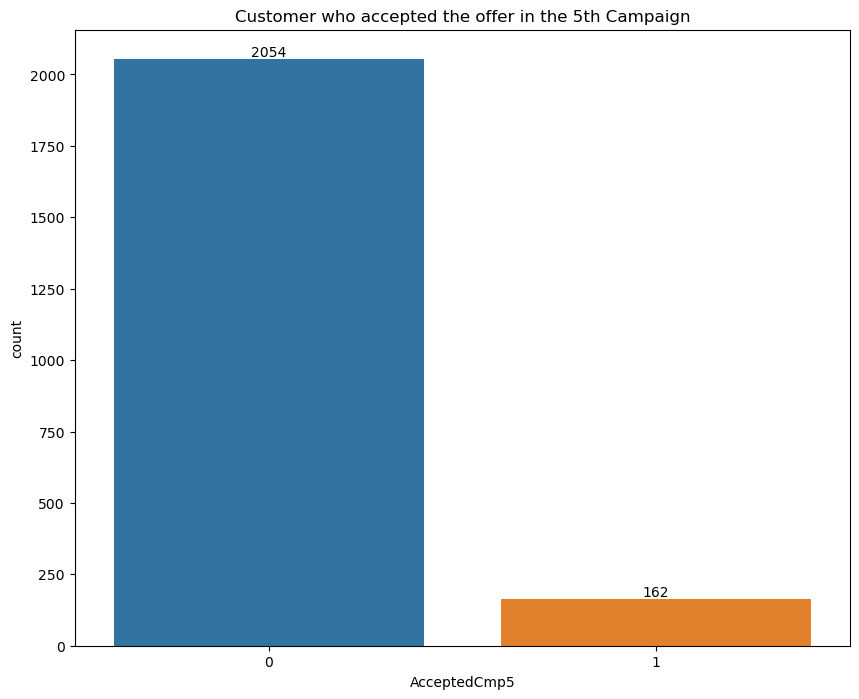

In [49]:
#UNIVARIATE ANALYSIS FOR CUSTOMERS WHO ACCEPTED THE OFFER IN THE 5TH CAMPAIGN
plt.figure(figsize=(10,8))
ax=sns.countplot(x='AcceptedCmp5',data=data1,order=data1['AcceptedCmp5'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.title("Customer who accepted the offer in the 5th Campaign")

plt.show()

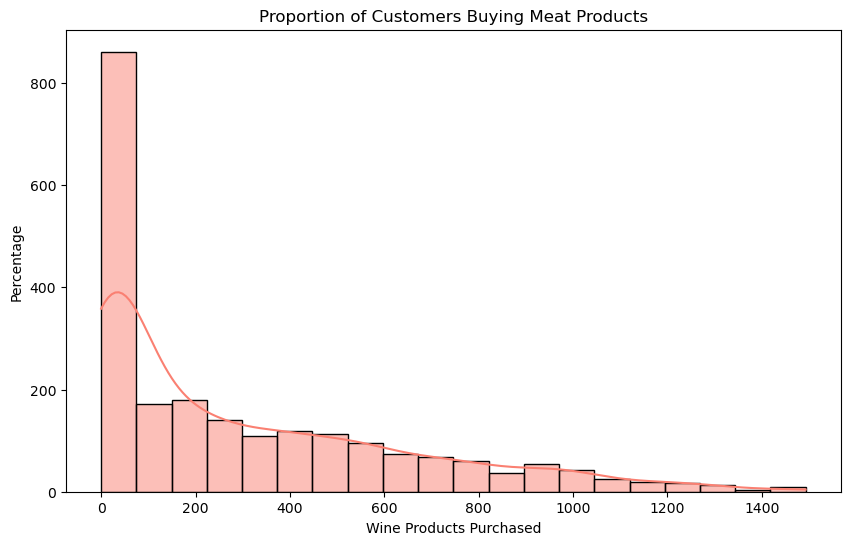

In [50]:
# UNIVARIATE ANALYSIS FOR WINE PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='Wines', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Meat Products')
plt.xlabel('Wine Products Purchased')
plt.ylabel('Percentage')
plt.show()

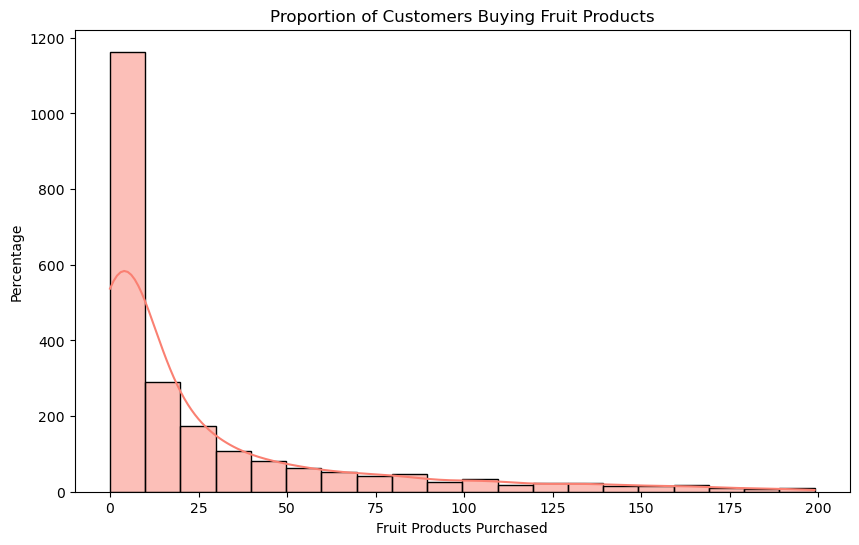

In [51]:
# UNIVARIATE ANALYSIS FOR FRUIT PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='Fruits', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Fruit Products')
plt.xlabel('Fruit Products Purchased')
plt.ylabel('Percentage')
plt.show()

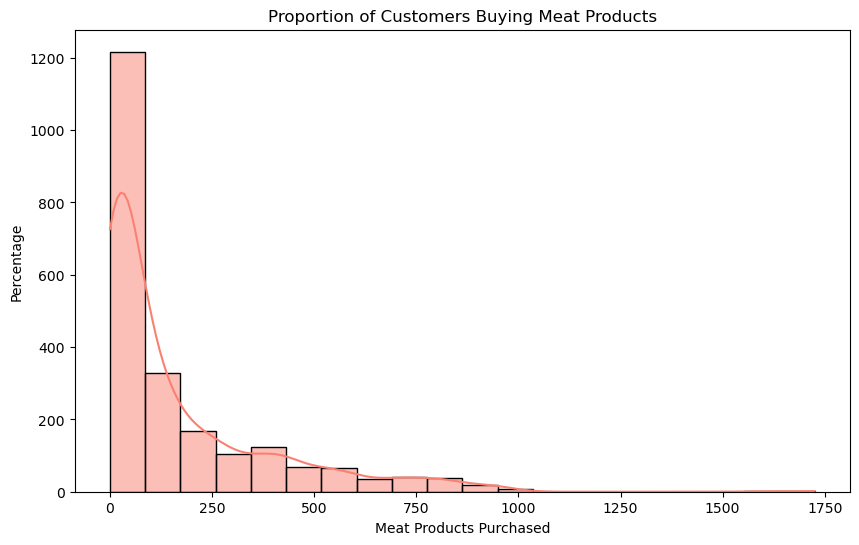

In [52]:
# UNIVARIATE ANALYSIS FOR MEAT PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='MeatProducts', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Meat Products')
plt.xlabel('Meat Products Purchased')
plt.ylabel('Percentage')
plt.show()


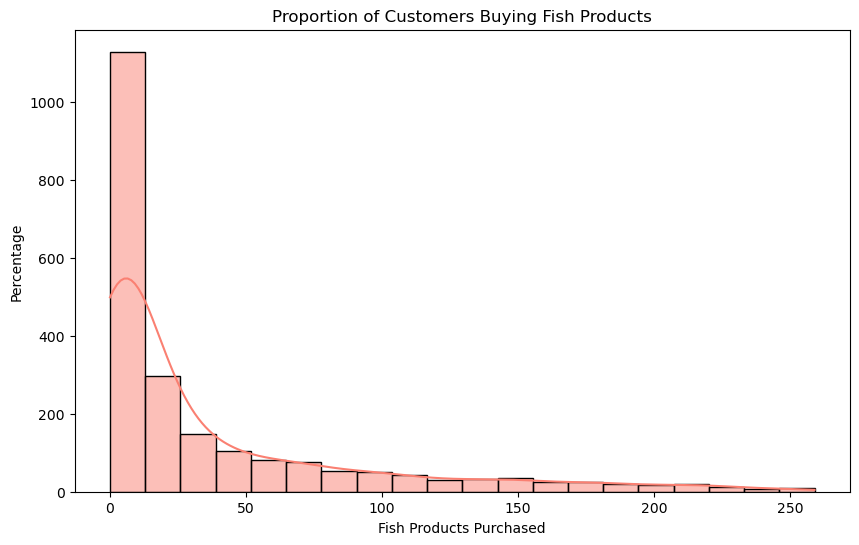

In [53]:
# UNIVARIATE ANALYSIS FOR FISH PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='FishProducts', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Fish Products')
plt.xlabel('Fish Products Purchased')
plt.ylabel('Percentage')
plt.show()

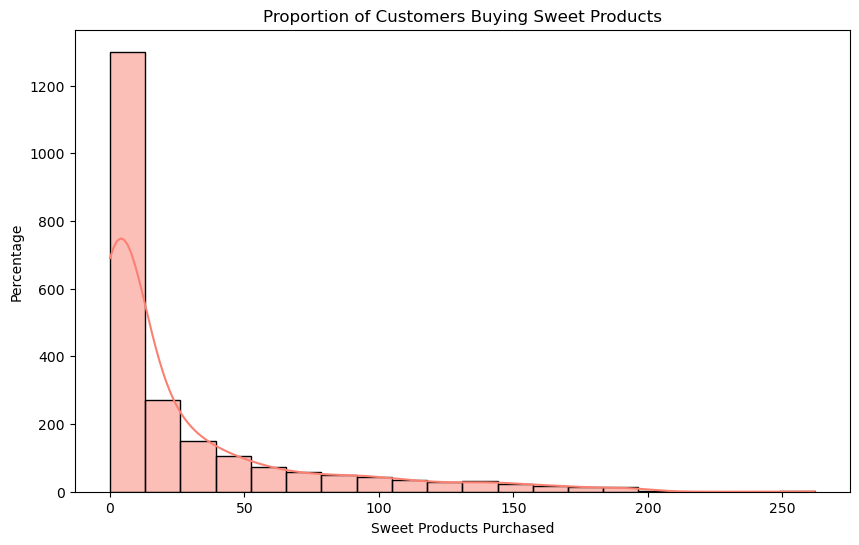

In [54]:
# UNIVARIATE ANALYSIS FOR SWEET PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='SweetProducts', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Sweet Products')
plt.xlabel('Sweet Products Purchased')
plt.ylabel('Percentage')
plt.show()

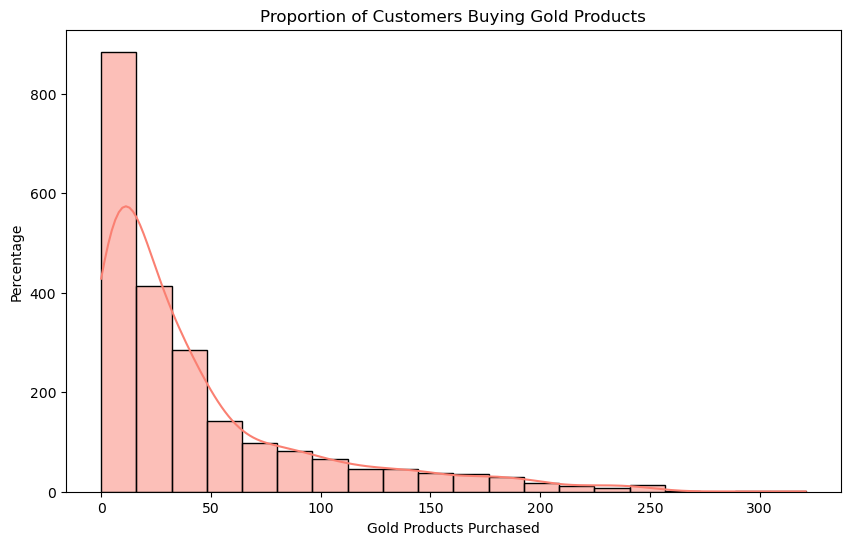

In [55]:
# UNIVARIATE ANALYSIS FOR GOLD PRODUCT PURCHASED
plt.figure(figsize=(10, 6))
sns.histplot(x='GoldProds', data=data, color='salmon',bins=20,kde=True)
plt.title('Proportion of Customers Buying Gold Products')
plt.xlabel('Gold Products Purchased')
plt.ylabel('Percentage')
plt.show()

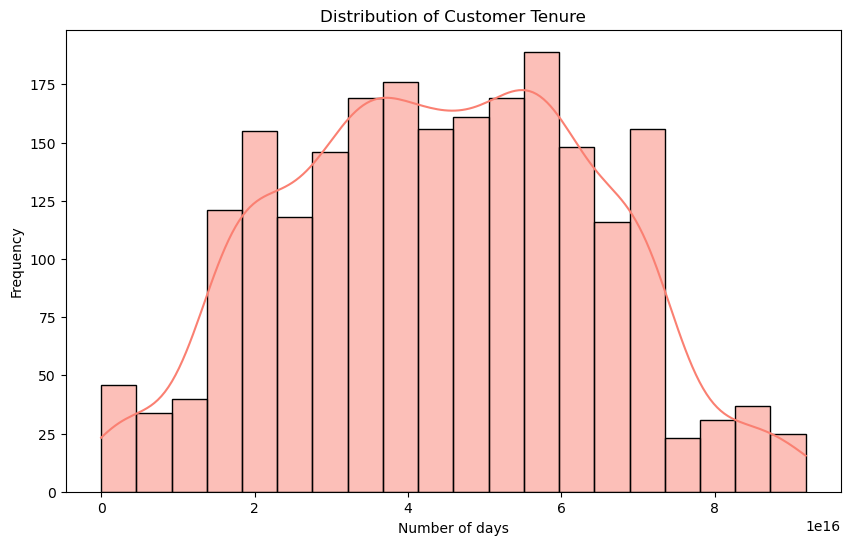

In [56]:
# UNIVARIATE ANALYSIS FOR
plt.figure(figsize=(10, 6))
sns.histplot(x='Customer_For', data=data, color='salmon',bins=20,kde=True)
plt.title('Distribution of Customer Tenure')
plt.xlabel('Number of days')
plt.ylabel('Frequency')
plt.show()

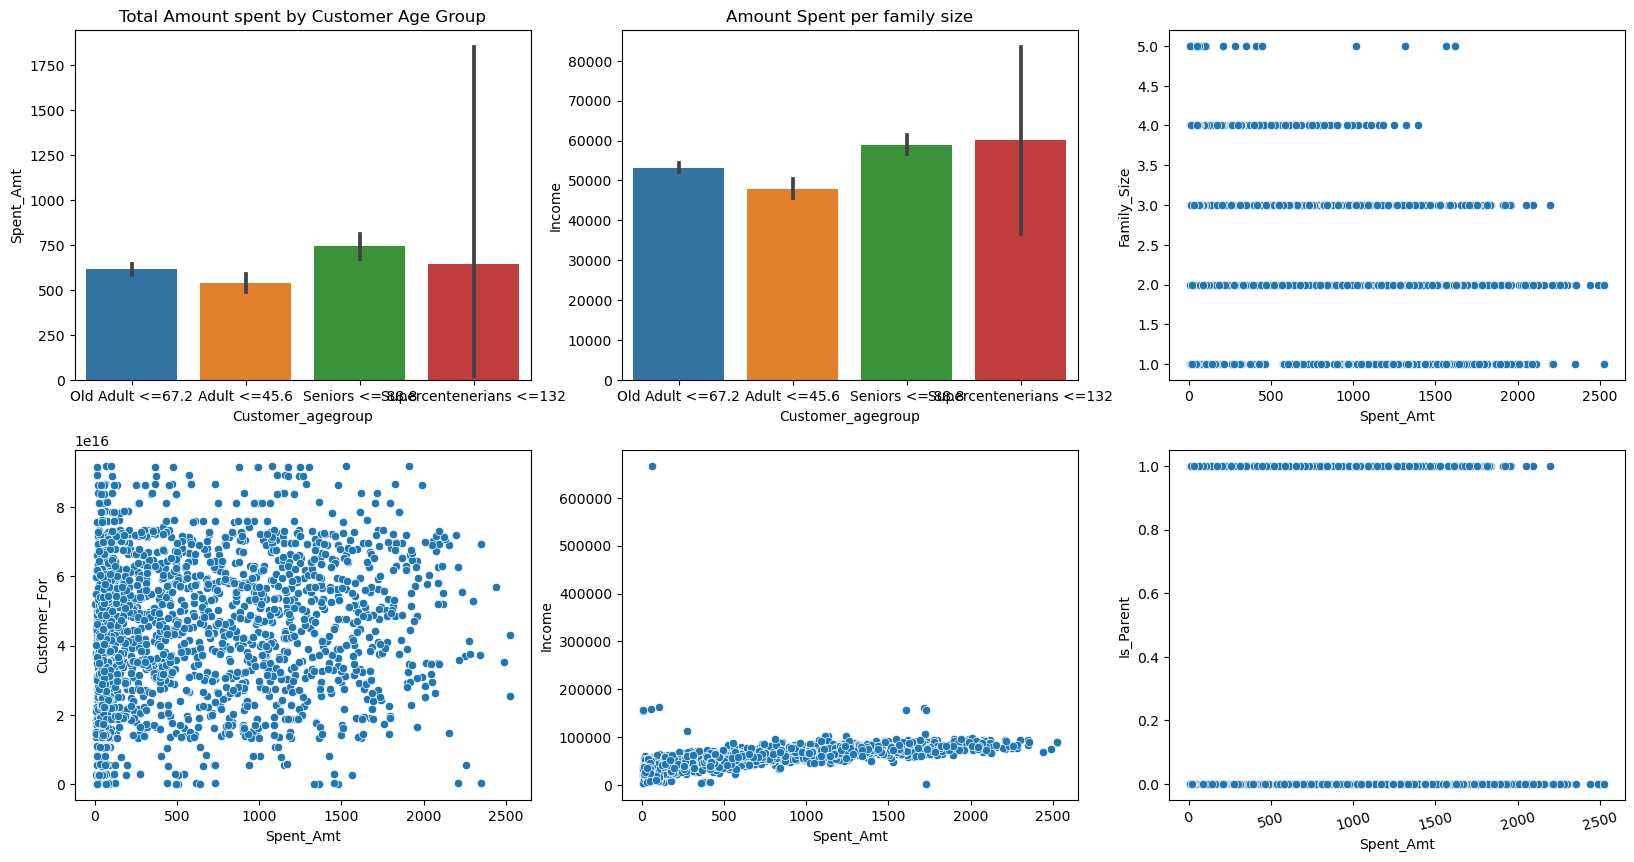

In [57]:
# BIVARIATE ANALYSIS BETWEEN AGE GROUP AND AMOUNT SPENT
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
Customer_agegroup_SptAmt = data1.groupby('Customer_agegroup')['Spent_Amt'].sum().reset_index()

sns.barplot(x='Customer_agegroup', data=data1, y='Spent_Amt', ax=axs[0, 0])
axs[0, 0].set_title("Total Amount spent by Customer Age Group")
plt.xticks(rotation=15)

Customer_agegroup_SptAmt = data1.groupby('Customer_agegroup')['Income'].sum().reset_index()

sns.barplot(x='Customer_agegroup', data=data1, y='Income', ax=axs[0, 1])
axs[0, 1].set_title("Customer Income by Age Group")
plt.xticks(rotation=15)



SptAmt_fam_size = data1.groupby('Spent_Amt')['Family_Size'].sum().reset_index()

sns.scatterplot(x='Spent_Amt', data=data1, y='Family_Size', ax=axs[0, 2])
axs[0, 1].set_title("Amount Spent per family size")
plt.xticks(rotation=15)


SptAmt_fam_size = data1.groupby('Spent_Amt')['Customer_For'].sum().reset_index()

sns.scatterplot(x='Spent_Amt', data=data1, y='Customer_For', ax=axs[1,0 ])
axs[0, 1].set_title("Total Amount Spent per Customer")
plt.xticks(rotation=15)




SptAmt_fam_size = data1.groupby('Spent_Amt')['Income'].sum().reset_index()

sns.scatterplot(x='Spent_Amt', data=data1, y='Income', ax=axs[1,1])
axs[0, 1].set_title("Customer Income")
plt.xticks(rotation=15)


SptAmt_fam_size = data1.groupby('Spent_Amt')['Is_Parent'].sum().reset_index()

sns.scatterplot(x='Spent_Amt', data=data1, y='Is_Parent', ax=axs[1,2 ])
axs[0, 1].set_title("Amount Spent per family size")
plt.xticks(rotation=15)

plt.show()


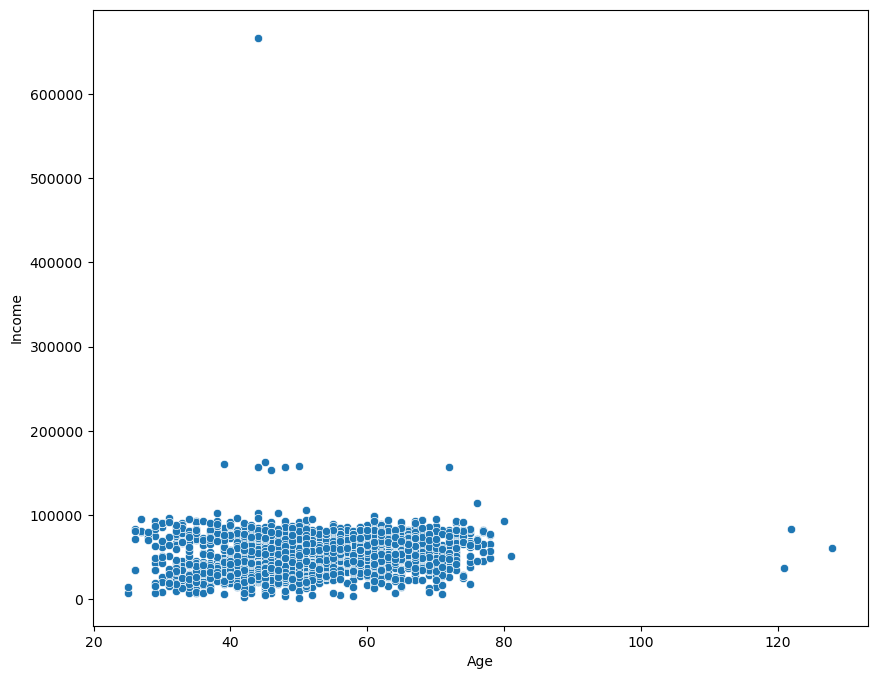

In [58]:
# BIVARIATE ANALYSIS FOR AGE AND INCOME
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',data=data1,y='Income')
plt.show()

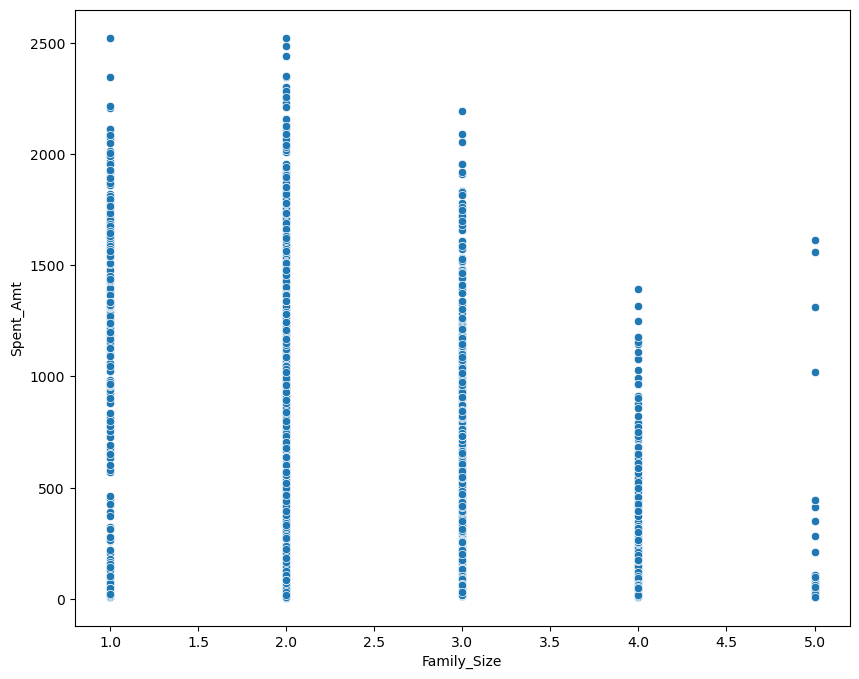

In [59]:
# BIVARIATE ANALYSIS FOR FAMILY SIZE AND AMOUNT SPENT
plt.figure(figsize=(10,8))
sns.scatterplot(x='Family_Size',data=data1,y="Spent_Amt")
plt.show()

## Observation
Upon conducting this analysis, a discernible trend emerges indicating a negative correlation between family size and the total amount spent. Notably, as the family size expands, there is a corresponding decrease in the overall amount spent. This observation sheds light on the potential influence of family size on consumer spending behavior, suggesting that larger families may exhibit more conservative spending habits. This insight can be valuable for marketing and promotional strategies, as it highlights the need for tailored approaches based on household characteristics.

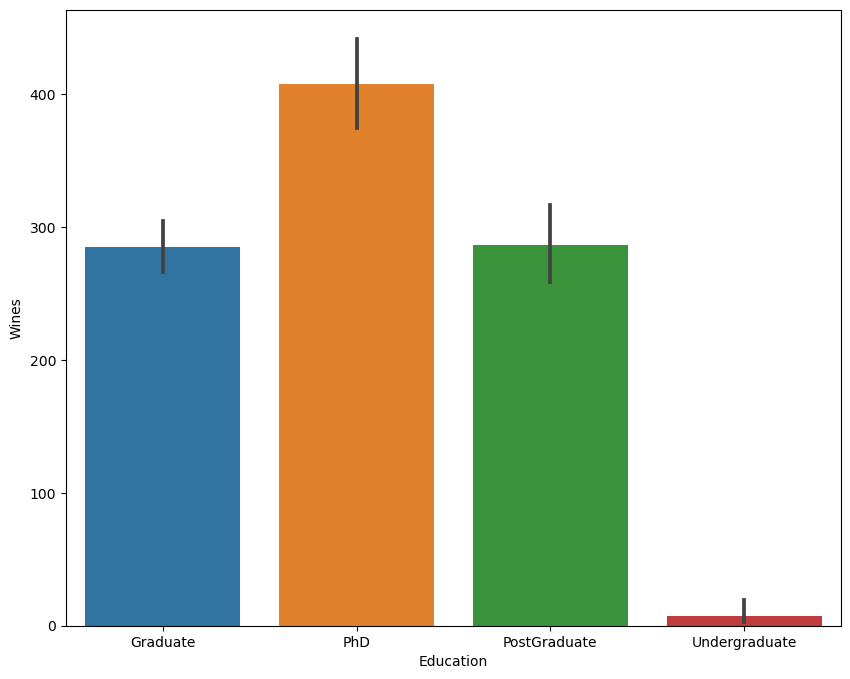

In [60]:
# BIVARIATE ANALYSIS FOR  EDUCATION AND WINE
plt.figure(figsize=(10,8))
sns.barplot(x='Education',data=data1,y='Wines')
plt.show()

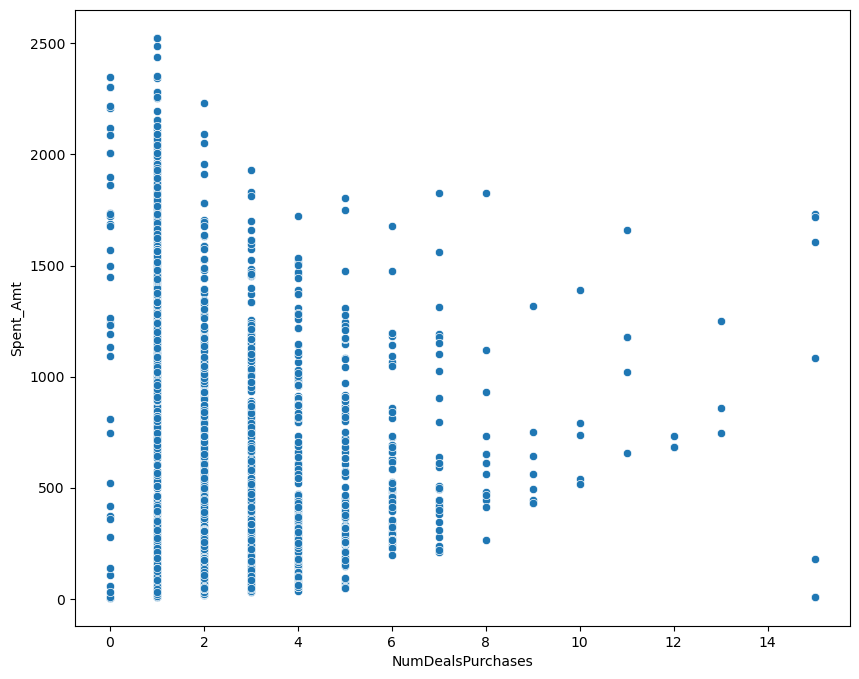

In [61]:
# BIVARIATE ANALYSIS FOR  NUMBER OF DEALS PURCHASED AND AMOUNTS SPENT
plt.figure(figsize=(10,8))
sns.scatterplot(x='NumDealsPurchases',data=data1,y='Spent_Amt')
plt.show()

## Observation
Upon careful examination of the data, it becomes apparent that there exists a negative correlation between the amount spent and the number of deals purchased with a discount. Specifically, as the count of discounted deals increases, there is a corresponding decrease in the total amount spent. This negative relationship suggests that customers may be more inclined to limit their spending when taking advantage of discounted deals, impacting the overall revenue generated from such promotions. Understanding this correlation is essential for optimizing discount strategies and their impact on customer spending behavior.



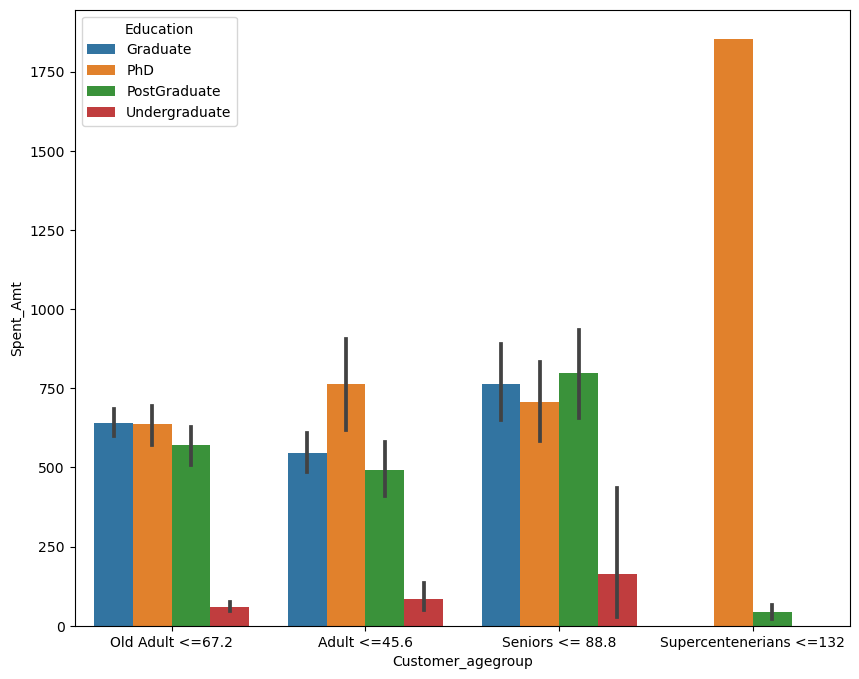

In [62]:
#multivariate Analysis- ANALYSING CUSTOMER AGE GROUP,EDUCATION AND AMOUNT SPENDT

plt.figure(figsize=(10,8))
sns.barplot(x='Customer_agegroup',data=data1,y='Spent_Amt',hue='Education')
plt.show()



## Observation
Spending Patterns Across Age and Education Groups:
Super centenarians (those aged <=132 years) holding a Ph.D. exhibit the highest spending behavior. Seniors (<=88.8 years) with graduate degrees closely follow, indicating a substantial spending pattern. In contrast, individuals with undergraduate qualifications, irrespective of age, tend to have the lowest spending behavior. These spending trends across different age and education segments highlight the varied consumer behaviors within the demographic. Understanding these patterns is crucial for tailoring marketing strategies and product offerings to better align with the preferences and financial capacities of specific customer segments.

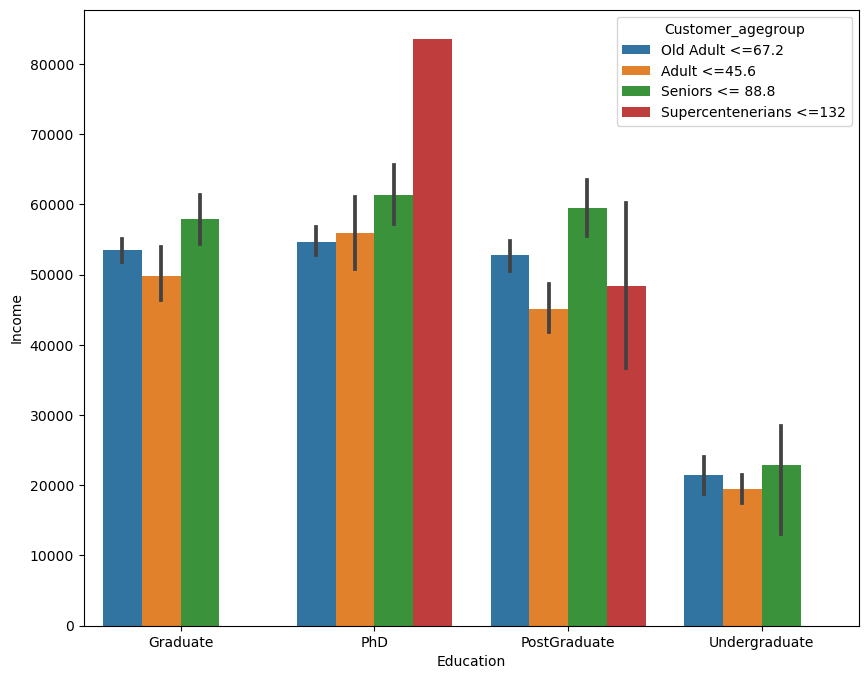

In [63]:
# ANALYSING RELATIONSHIP BETWEEN INCOME ?EDUCATION AND CUSTOMER AGE GROUP
plt.figure(figsize=(10,8))
sns.barplot(x="Education",data=data1,y="Income",hue='Customer_agegroup')
plt.show()

## Observation
Income Disparities Across Age Groups and Education Levels:
*Super centenarians (<=132 years) with Doctorate Degrees exhibit the highest income levels.
*Seniors (<=88 years) holding PhD, Graduate, and Postgraduate degrees also demonstrate substantial incomes.
*Notably, adults (<=45.6 years) across all education groups consistently have the lowest income levels.
These observations highlight the influence of both age and education on income. The data suggests that individuals with higher educational qualifications tend to have higher incomes, and this trend is particularly pronounced among super centenarians and seniors. Understanding these patterns can be crucial for tailoring targeted strategies and services based on the demographics of different age and education segments.
data1.columns

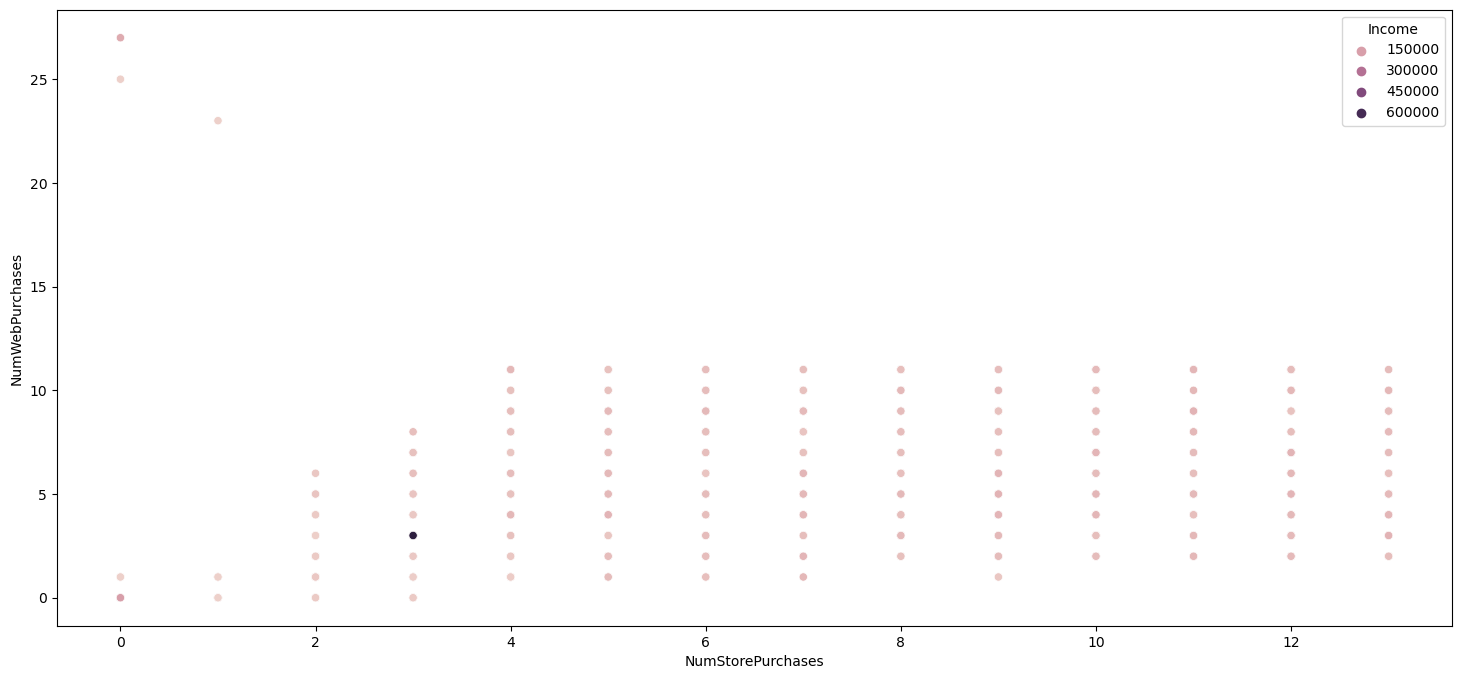

In [64]:
#ANALYSING NUMBER OF STORE PURCHASE BY NEW WEB PURCHASE
plt.figure(figsize=(18,8))
sns.scatterplot(x='NumStorePurchases',  data=data1,  y='NumWebPurchases',  hue="Income")
plt.show()

## Observation
From this plot we can see that most income was generated from store purchases.

                     AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
AcceptedCmp1             1.000000      0.176637      0.095683      0.242782   
AcceptedCmp2             0.176637      1.000000      0.071702      0.295050   
AcceptedCmp3             0.095683      0.071702      1.000000     -0.079659   
AcceptedCmp4             0.242782      0.295050     -0.079659      1.000000   
AcceptedCmp5             0.407878      0.222121      0.080248      0.311314   
Income                   0.276820      0.087545     -0.016174      0.184400   
GoldProds                0.170132      0.050734      0.124958      0.024015   
NumDealsPurchases       -0.127374     -0.037981     -0.023135      0.016077   
NumWebPurchases          0.159292      0.034829      0.042958      0.162932   
NumCatalogPurchases      0.309026      0.099915      0.104345      0.140182   
NumStorePurchases        0.178743      0.085271     -0.068913      0.178020   
NumWebVisitsMonth       -0.194773     -0.007362     

<Axes: >

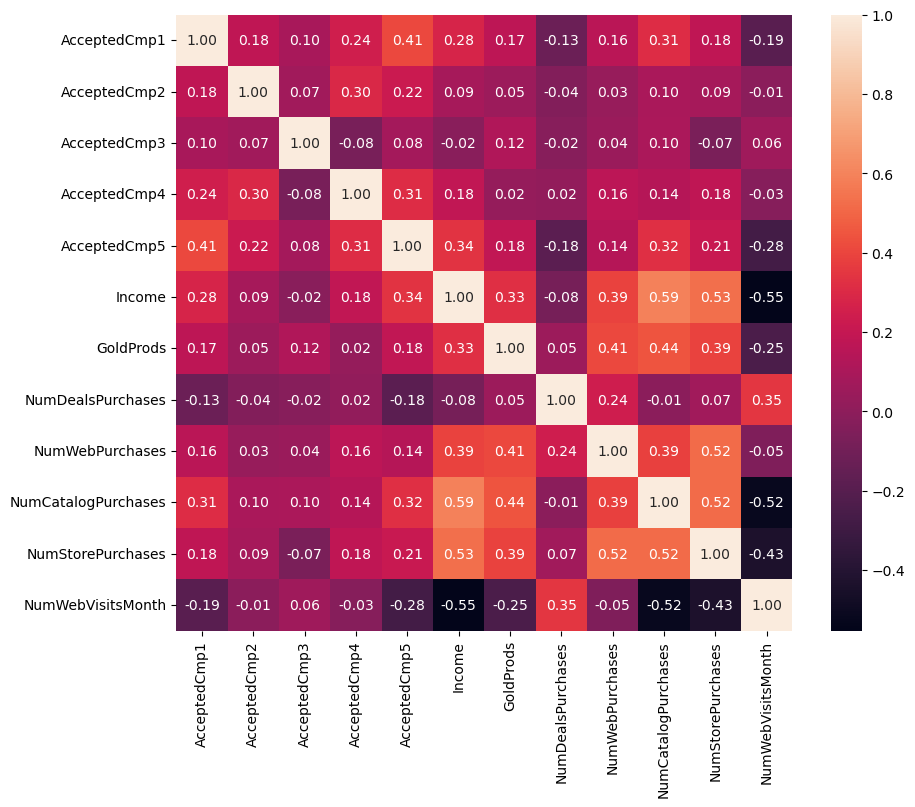

In [65]:
#ANALYSING CORRELATION BETWEEN THESE FEATURES

selected_columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Income",'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']
selected_data = data1[selected_columns]
corr_matrix = selected_data.corr()
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,square=True,fmt=".2f")

Observation Report:
Upon analyzing the provided plot, the following observations are noted:

Accepted Campaigns Contribution:

AcceptedCmp1 contributed to 27% of the income and exhibited a positive relationship with NumWebPurchases (15%).

AcceptedCmp2 generated 8% of the income, positively correlating with NewWebPurchases (3%).

AcceptedCmp3 generated a mere 1% of the income, with a positive correlation observed with NumWebPurchases (4%).

AcceptedCmp4 made an 18% income contribution, showing a positive relation with NewWebPurchases (16%).

AcceptedCmp5 was the most impactful, generating 33% of the income, and demonstrating a positive correlation with NewWebPurchases (14%).

Notably, AcceptedCampaign 3 displayed the least performance among the campaigns.

GoldProds Impact:
GoldProds significantly contributed, generating 33% of the income.

GoldProds displayed a positive relationship with the number of store purchases (39%), number of catalog purchases (44%), and new web visits per month (41%).

NumDealsPurchases Influence:
NumDealsPurchases had a negative impact, resulting in a -8% contribution to income. This implies a negative correlation with the number of purchases made with a discount.

NumWebPurchases Contribution:
NumWebPurchases had a substantial impact, contributing 39% to the income.

NumCatalogPurchases Significance:
NumCatalogPurchases showed a strong contribution, generating 59% of the income. However, it exhibited a strong negative correlation (52%) with the Number of web visits per month. NumStorePurchases and Relations:

NumStorePurchases played a crucial role, contributing 53% to the income. It had a strong positive correlation (52%) with the number of catalog purchases and the number of web purchases. Conversely, NumStorePurchases exhibited a strong negative correlation (43%) with the Number of web visits per month.

NumWebVisitsMonth and Its Impact:
NumWebVisitsMonth displayed a strong negative correlation (55%) with income. This suggests that as the number of web visits per month increases, income tends to decrease.

These findings provide valuable insights into the contributions and relationships between various factors, aiding in the identification of key drivers and areas for improvement in the company's marketing and sales strategies.

In [66]:
#descriptive statistics
data1.describe()

Income      Recency        Wines       Fruits  MeatProducts  \
count    2216.000000  2216.000000  2216.000000  2216.000000   2216.000000   
mean    52247.251354    49.012635   305.091606    26.356047    166.995939   
std     25173.076661    28.948352   337.327920    39.793917    224.283273   
min      1730.000000     0.000000     0.000000     0.000000      0.000000   
25%     35303.000000    24.000000    24.000000     2.000000     16.000000   
50%     51381.500000    49.000000   174.500000     8.000000     68.000000   
75%     68522.000000    74.000000   505.000000    33.000000    232.250000   
max    666666.000000    99.000000  1493.000000   199.000000   1725.000000   

       FishProducts  SweetProducts    GoldProds  NumDealsPurchases  \
count   2216.000000    2216.000000  2216.000000        2216.000000   
mean      37.637635      27.028881    43.965253           2.323556   
std       54.752082      41.072046    51.815414           1.923716   
min        0.000000       0.000000     0.000000           0.000000   
25%        3.000000       1.000000     9.000000           1.000000   
50%       12.000000       8.000000    24.500000           2.000000   
75%       50.000000      33.000000    56.000000           3.000000   
max      259.000000     262.000000   321.000000          15.000000   

       NumWebPurchases  ...  AcceptedCmp1  AcceptedCmp2     Complain  \
count      2216.000000  ...   2216.000000   2216.000000  2216.000000   
mean          4.085289  ...      0.064079      0.013538     0.009477   
std           2.740951  ...      0.244950      0.115588     0.096907   
min           0.000000  ...      0.000000      0.000000     0.000000   
25%           2.000000  ...      0.000000      0.000000     0.000000   
50%           4.000000  ...      0.000000      0.000000     0.000000   
75%           6.000000  ...      0.000000      0.000000     0.000000   
max          27.000000  ...      1.000000      1.000000     1.000000   

          Response  Customer_For          Age    Spent_Amt     Children  \
count  2216.000000  2.216000e+03  2216.000000  2216.000000  2216.000000   
mean      0.150271  4.423735e+16    52.179603   607.075361     0.947202   
std       0.357417  2.008532e+16    11.985554   602.900476     0.749062   
min       0.000000  0.000000e+00    25.000000     5.000000     0.000000   
25%       0.000000  2.937600e+16    44.000000    69.000000     0.000000   
50%       0.000000  4.432320e+16    51.000000   396.500000     1.000000   
75%       0.000000  5.927040e+16    62.000000  1048.000000     1.000000   
max       1.000000  9.184320e+16   128.000000  2525.000000     3.000000   

       Family_Size    Is_Parent  
count  2216.000000  2216.000000  
mean      2.591606     0.714350  
std       0.906810     0.451825  
min       1.000000     0.000000  
25%       2.000000     0.000000  
50%       3.000000     1.000000  
75%       3.000000     1.000000  
max       5.000000     1.000000  

[8 rows x 26 columns]

In [67]:
#describe categorical features
data1.describe(include=(bool,object))

Education Living_With Customer_income_group Customer_agegroup
count       2216        2216                  2216              2216
unique         4           3                     2                 4
top     Graduate     Partner   Low income <=223375  Old Adult <=67.2
freq        1116        1430                  2215              1260

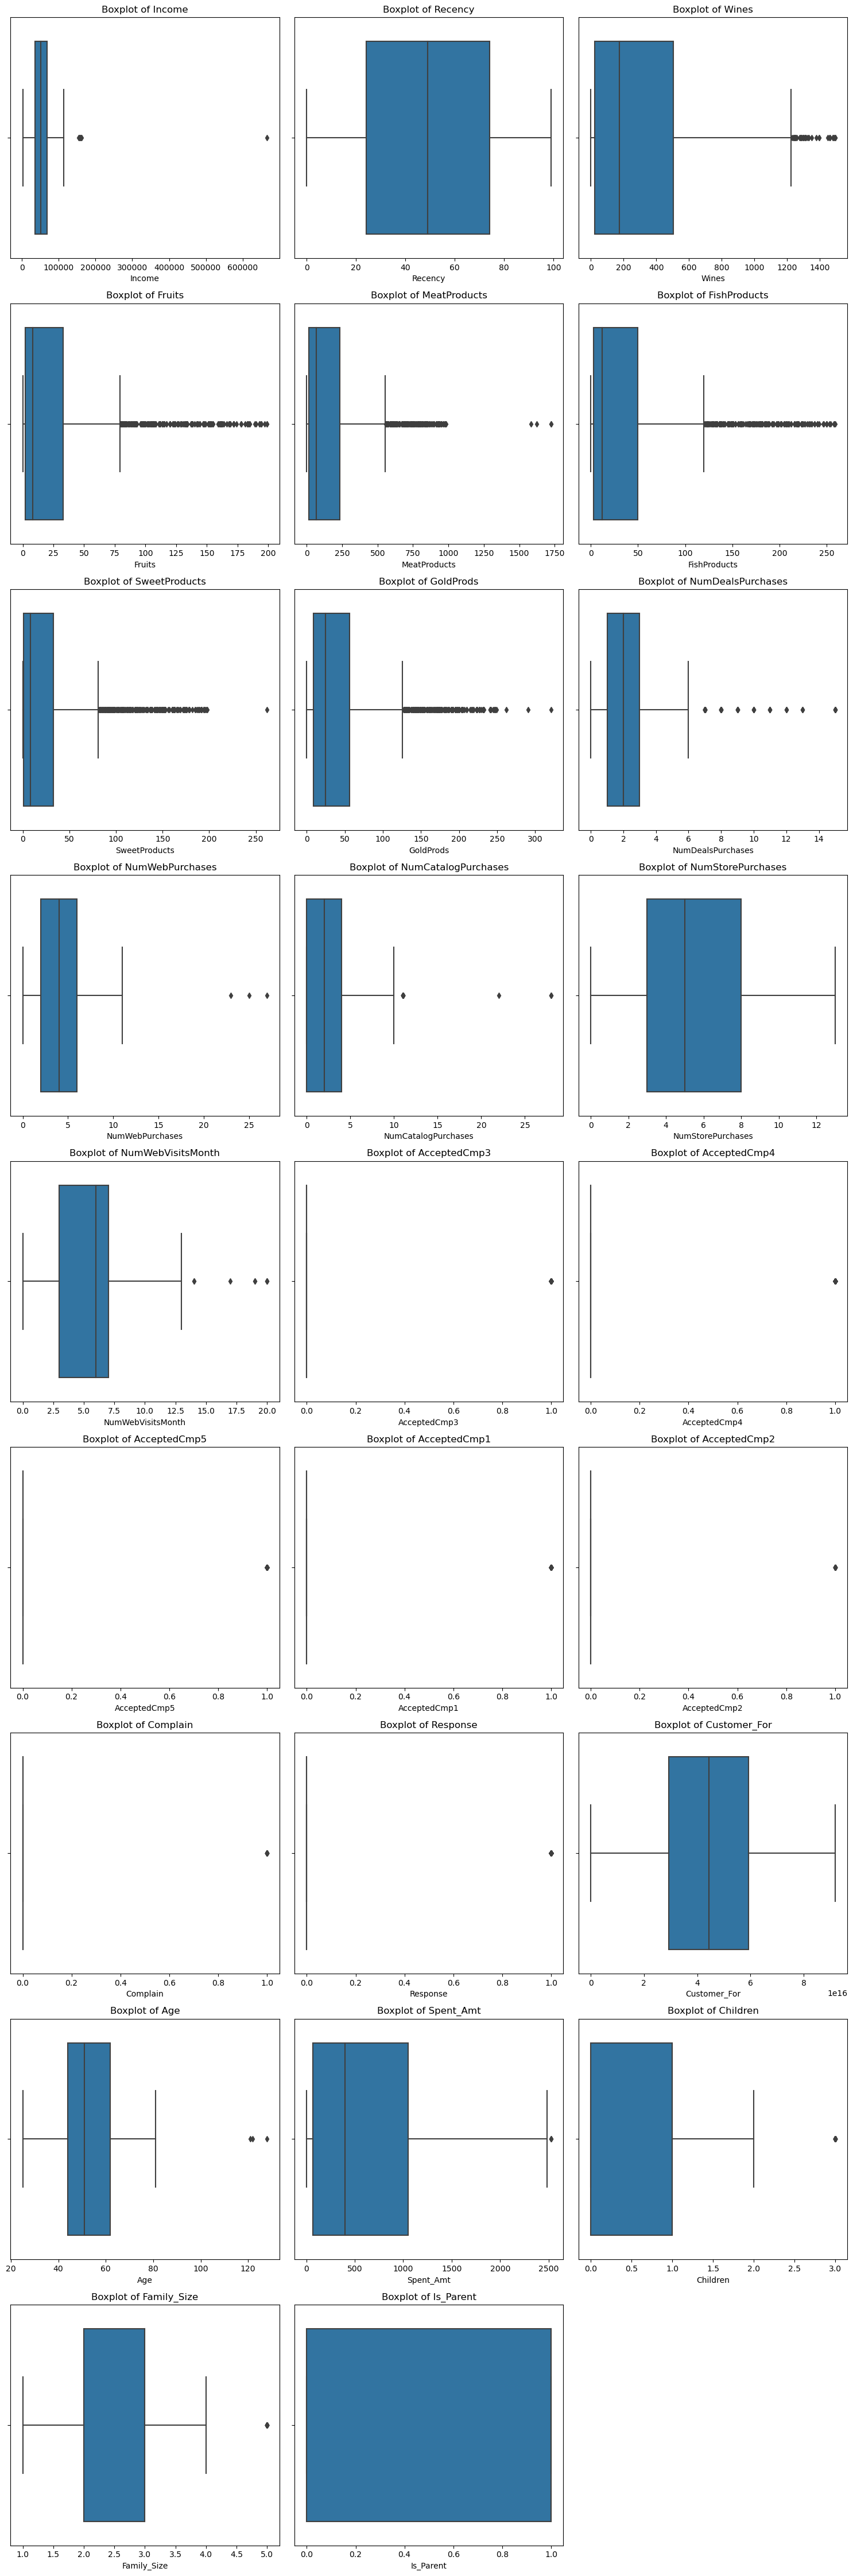

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data1'
numerical_columns = data1.select_dtypes(include='number').columns

# Calculate the number of subplots needed
num_plots = len(numerical_columns)

# Set the size of the plot
plt.figure(figsize=(15, 5 * (num_plots // 3 + (num_plots % 3 > 0))))

# Iterate through numerical columns and plot boxplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_plots // 3 + (num_plots % 3 > 0), 3, i)
    sns.boxplot(x=data1[column])
    plt.title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()



In [69]:
data1=data1[data1["Income"]<=160000]
data1=data1[data1["Wines"]<=1400]
data1=data1[data1["Fruits"]<=125]
data1=data1[data1["MeatProducts"]<=1500]
data1=data1[data1["FishProducts"]<=200]
data1=data1[data1["SweetProducts"]<=250]
data1=data1[data1["GoldProds"]<=250]
data1=data1[data1["NumDealsPurchases"]<=8]
data1=data1[data1["NumWebVisitsMonth"]<=12.5]
data1=data1[data1["NumCatalogPurchases"]<=10]
data1=data1[data1["NumWebPurchases"]<=20]
print(f"the total number of data points after removing outliers:{len(data1)}")



the total number of data points after removing outliers:2002


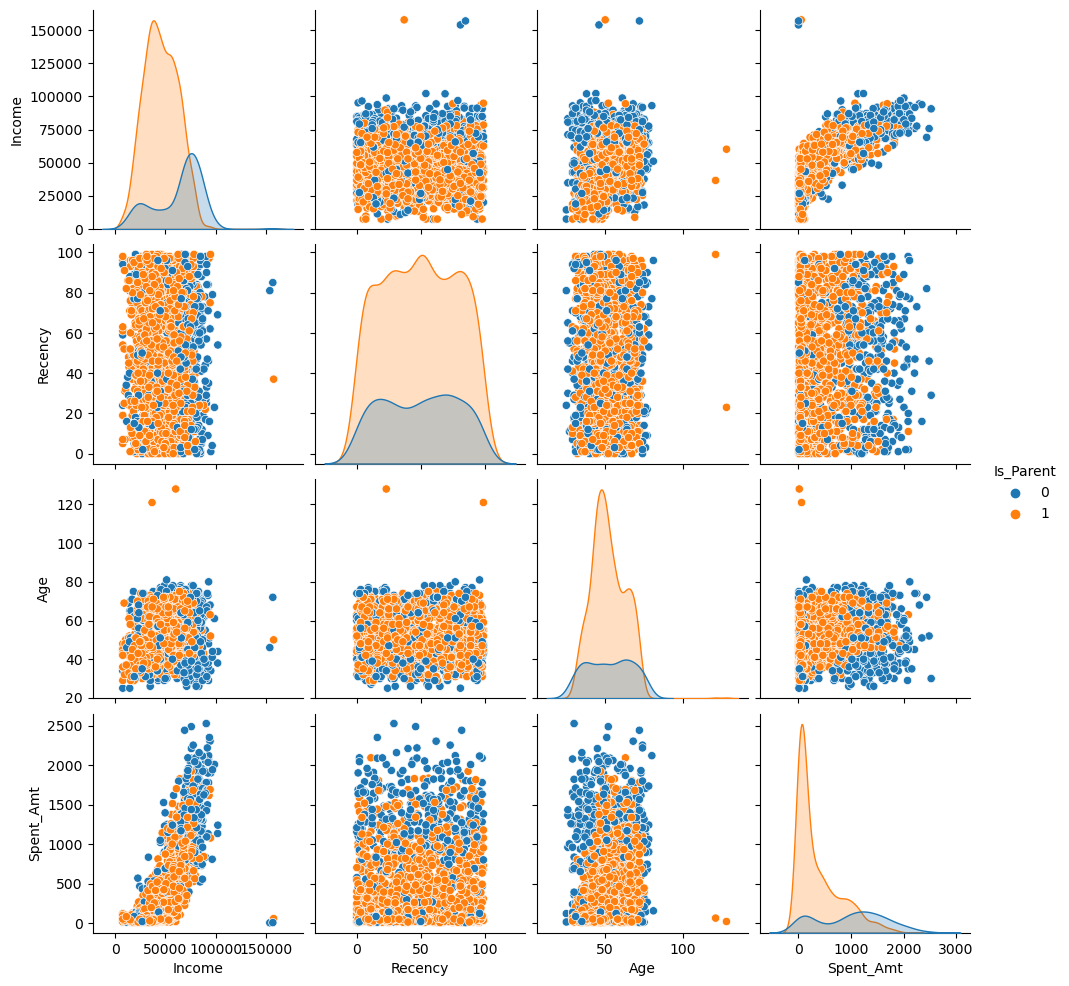

In [70]:
#To plot some selected features
cat_var = ["Income","Recency","Age","Spent_Amt","Is_Parent"]
sns.pairplot(data1[cat_var],hue="Is_Parent")


## Observation
The analysis reveals a distinct pattern among customers who are parents – a majority of them tend to earn a lower income (<=200,000) and exhibit lower spending compared to their non-parent counterparts. Furthermore, in terms of recency, parents are more prevalent in the "Number of days since the customer's last purchase" metric.

Additionally, the data indicates that younger parents tend to spend less than customers who are not parents. This observation underscores the influence of parenthood on spending behavior, with age playing a noteworthy role.

Moreover, a noteworthy finding emerges in the analysis, revealing a positive linear relationship between the customer's income and the amount spent. As income increases, there is a corresponding upward trend in the amount spent, highlighting the significance of income in shaping customer spending patterns. This insight can inform targeted marketing strategies, tailored to the distinct characteristics of parent and non-parent segments, as well as the influence of income on customer spending.

In [71]:
#Dropping the outliers by setting a cap on Age and income.
data1=data1[(data1["Age"]<90)]
data1=data1[(data1["Income"]<600000)]
print(f"the total number of data points after removing the outliers are:{len(data1)}")

the total number of data points after removing the outliers are:2000


## UNSUPERVISED MACHINE LEARNING
Naturally in Machine Learning, We often implemement UnSupervised ML models as either; a part of the Feature Engineering Process,i.e to either help us obtain more insights during the EDA, or as a step to reduce the dimensions to improve the performance of any Supervised ML model.

For this class simulation/ Case study , we will use the pca for feature decomposition and kmeans as a clustering algorithm, please feel free to research and test implememnt 'other' decomposition algortihms listed above and other clustering algorithms explored above too, compare the performances and you can decide to stick with a combination that suits you

##Dimensionality Reduction More input features often make a predictive modelling task more challenging to model, more generally referred to as the curse of dimensionality. thus,Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.

Principal Componenet Analysis (PCA) is a technique for redcuing the dimensions of a large dataset, increasing the interpreatblilty and at the same minimizing information loss other exmaples of Dimensionality Reduction techniques include Self Organizing Maps (SOM), t-distributed Stochastic Neighbor Embedding (t-SNE) etc.

In [72]:
#creating a copy of the data set and dropping off redundant features
data2=data1.copy()

In [73]:
#importing from sklearn lib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler

#encode cat_var
s = (data2.dtypes == 'object')
cat_var = list(s[s].index)

encoder =LabelEncoder()
for i in cat_var:
    data2[i]=encoder.fit_transform(data2[[i]])


In [74]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Education              2000 non-null   int32  
 1   Income                 2000 non-null   float64
 2   Recency                2000 non-null   int64  
 3   Wines                  2000 non-null   int64  
 4   Fruits                 2000 non-null   int64  
 5   MeatProducts           2000 non-null   int64  
 6   FishProducts           2000 non-null   int64  
 7   SweetProducts          2000 non-null   int64  
 8   GoldProds              2000 non-null   int64  
 9   NumDealsPurchases      2000 non-null   int64  
 10  NumWebPurchases        2000 non-null   int64  
 11  NumCatalogPurchases    2000 non-null   int64  
 12  NumStorePurchases      2000 non-null   int64  
 13  NumWebVisitsMonth      2000 non-null   int64  
 14  AcceptedCmp3           2000 non-null   int64  
 15  AcceptedC

In [75]:
#scale dataset
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2),columns=data2.columns)
scaled_data

#scaler = MinMaxScaler()



Education    Income   Recency     Wines    Fruits  MeatProducts  \
0      0.000000  0.337063  0.585859  0.454871  0.709677      0.560575   
1      0.000000  0.258558  0.383838  0.007880  0.008065      0.006160   
2      0.000000  0.426757  0.262626  0.305158  0.395161      0.130390   
3      0.000000  0.127442  0.262626  0.007880  0.032258      0.020534   
4      0.333333  0.338095  0.949495  0.123926  0.346774      0.121150   
...         ...       ...       ...       ...       ...           ...   
1995   0.000000  0.357598  0.464646  0.507880  0.346774      0.186858   
1996   0.333333  0.376176  0.565657  0.290831  0.000000      0.030801   
1997   0.000000  0.329362  0.919192  0.650430  0.387097      0.222793   
1998   0.666667  0.410995  0.080808  0.306590  0.241935      0.219713   
1999   0.333333  0.301991  0.404040  0.060172  0.024194      0.062628   

      FishProducts  SweetProducts  GoldProds  NumDealsPurchases  ...  \
0         0.864322       0.444444   0.354839              0.375  ...   
1         0.010050       0.005051   0.024194              0.250  ...   
2         0.557789       0.106061   0.169355              0.125  ...   
3         0.050251       0.015152   0.020161              0.250  ...   
4         0.231156       0.136364   0.060484              0.625  ...   
...            ...            ...        ...                ...  ...   
1995      0.211055       0.595960   0.995968              0.250  ...   
1996      0.000000       0.000000   0.032258              0.875  ...   
1997      0.160804       0.060606   0.096774              0.125  ...   
1998      0.402010       0.151515   0.245968              0.250  ...   
1999      0.010050       0.005051   0.084677              0.375  ...   

      Response  Customer_For       Age  Spent_Amt  Living_With  Children  \
0          1.0      0.913452  0.696429   0.639539          0.5  0.000000   
1          0.0      0.117592  0.750000   0.008337          0.5  0.666667   
2          0.0      0.444026  0.553571   0.305677          1.0  0.000000   
3          0.0      0.061148  0.214286   0.018658          1.0  0.333333   
4          0.0      0.301976  0.267857   0.165145          1.0  0.333333   
...        ...           ...       ...        ...          ...       ...   
1995       0.0      0.508937  0.517857   0.529972          1.0  0.333333   
1996       0.0      0.057385  0.892857   0.173879          1.0  1.000000   
1997       0.0      0.296331  0.267857   0.490274          0.5  0.000000   
1998       0.0      0.297272  0.714286   0.332275          1.0  0.333333   
1999       1.0      0.735654  0.750000   0.065899          1.0  0.666667   

      Family_Size  Is_Parent  Customer_income_group  Customer_agegroup  
0            0.00        0.0                    0.0                0.5  
1            0.50        1.0                    0.0                0.5  
2            0.25        0.0                    0.0                0.5  
3            0.50        1.0                    0.0                0.0  
4            0.50        1.0                    0.0                0.0  
...           ...        ...                    ...                ...  
1995         0.50        1.0                    0.0                0.5  
1996         1.00        1.0                    0.0                1.0  
1997         0.00        0.0                    0.0                0.0  
1998         0.50        1.0                    0.0                0.5  
1999         0.75        1.0                    0.0                0.5  

[2000 rows x 30 columns]

In [82]:
#instantiate PCA to reduce dimension
pca = PCA(n_components = 3)
PCA_ds=pd.DataFrame(pca.fit_transform(scaled_data),columns=(["col1","col2","col3"]))
PCA_ds

col1      col2      col3
0     1.557453 -0.076980  0.485468
1    -0.626946  0.002529 -0.161507
2     0.823046  0.157123 -0.387822
3    -0.600844  0.350896 -0.000668
4    -0.190997 -0.061739 -0.131479
...        ...       ...       ...
1995  0.323753 -0.637736 -0.092004
1996 -0.463637 -0.992198 -0.062010
1997  0.937779  0.406593 -0.212691
1998  0.230215 -0.445998 -0.161039
1999 -0.445581 -0.234524  0.700664

[2000 rows x 3 columns]

In [83]:
pca.explained_variance_ratio_

array([0.28400701, 0.1069072 , 0.0854601 ])

Text(0.5, 0.92, '3d Visualization of new dimensions')

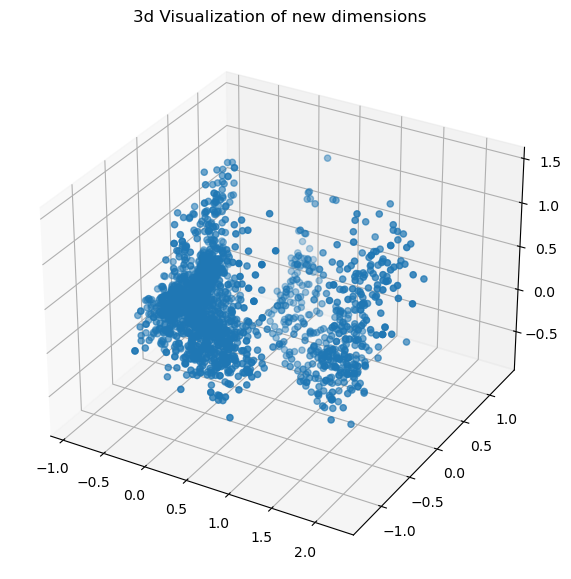

In [84]:
#visualizing our new data dimensions
x = PCA_ds['col1']
y = PCA_ds["col2"]
z = PCA_ds["col3"]

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker = "o")
ax.set_title("3d Visualization of new dimensions")

## K-means clustering
K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (Wiki). This is a method of unsupervised learning that learns the commonalities between groups of data without any target or labeled variable.

K-means clustering algorithm spits the records in the data into a pre-defined number of clusters, where the data points within each cluster are close to each other. One difficulty of using k-means clustering for customer segmentation is the fact that you need to know the number of clusters beforehand. Luckily, the silhouette coefficient can help you.

The silhouette coefficient measures how close the data points are to their clusters compared to other clusters. The silhouette coefficient values range from -1 to 1, where the closer the values are to 1, the better they are.

Let's find the best number of clusters:

Clustering
elbow method to determine the number of clusters to be made
clustering via kmeans clustering
examine our new cluster by plotting

In [86]:
!pip install scikit-learn yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

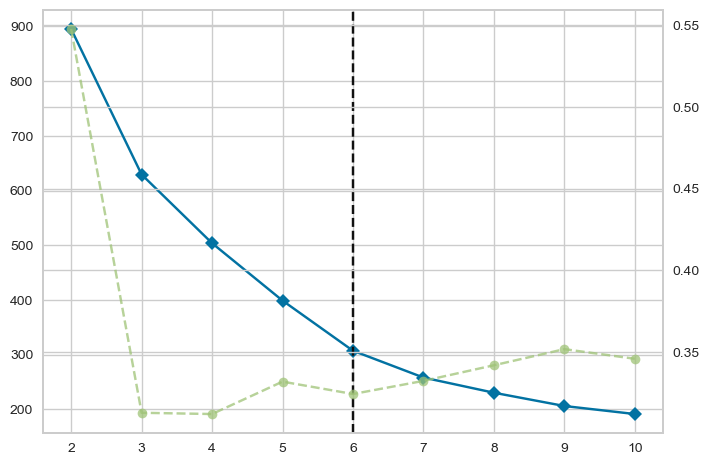

In [88]:
# Instantiate KElbowVisualizer
elbow = KElbowVisualizer(KMeans())

elbow.fit(PCA_ds)

In [89]:
#fitting Kmeans algo to our dataset
kmeans = KMeans(n_clusters=7)
y_means = kmeans.fit_predict(PCA_ds)


#adding the clusters to the dimensions dataframe
PCA_ds["clusters"] = y_means

data1["clusters"]= y_means

In [90]:
#PCA_ds
data1

Education   Income  Recency  Wines  Fruits  MeatProducts  \
0         Graduate  58138.0       58    635      88           546   
1         Graduate  46344.0       38     11       1             6   
2         Graduate  71613.0       26    426      49           127   
3         Graduate  26646.0       26     11       4            20   
4              PhD  58293.0       94    173      43           118   
...            ...      ...      ...    ...     ...           ...   
2235      Graduate  61223.0       46    709      43           182   
2236           PhD  64014.0       56    406       0            30   
2237      Graduate  56981.0       91    908      48           217   
2238  PostGraduate  69245.0        8    428      30           214   
2239           PhD  52869.0       40     84       3            61   

      FishProducts  SweetProducts  GoldProds  NumDealsPurchases  ...  \
0              172             88         88                  3  ...   
1                2              1          6                  2  ...   
2              111             21         42                  1  ...   
3               10              3          5                  2  ...   
4               46             27         15                  5  ...   
...            ...            ...        ...                ...  ...   
2235            42            118        247                  2  ...   
2236             0              0          8                  7  ...   
2237            32             12         24                  1  ...   
2238            80             30         61                  2  ...   
2239             2              1         21                  3  ...   

           Customer_For  Age  Spent_Amt  Living_With  Children  Family_Size  \
0     83894400000000000   64       1617        Alone         0            1   
1     10800000000000000   67         27        Alone         2            3   
2     40780800000000000   56        776      Partner         0            2   
3      5616000000000000   37         53      Partner         1            3   
4     27734400000000000   40        422      Partner         1            3   
...                 ...  ...        ...          ...       ...          ...   
2235  46742400000000000   54       1341      Partner         1            3   
2236   5270400000000000   75        444      Partner         3            5   
2237  27216000000000000   40       1241        Alone         0            1   
2238  27302400000000000   65        843      Partner         1            3   
2239  67564800000000000   67        172      Partner         2            4   

      Is_Parent  Customer_income_group  Customer_agegroup  clusters  
0             0    Low income <=223375   Old Adult <=67.2         5  
1             1    Low income <=223375   Old Adult <=67.2         3  
2             0    Low income <=223375   Old Adult <=67.2         0  
3             1    Low income <=223375       Adult <=45.6         6  
4             1    Low income <=223375       Adult <=45.6         3  
...         ...                    ...                ...       ...  
2235          1    Low income <=223375   Old Adult <=67.2         2  
2236          1    Low income <=223375    Seniors <= 88.8         3  
2237          0    Low income <=223375       Adult <=45.6         0  
2238          1    Low income <=223375   Old Adult <=67.2         2  
2239          1    Low income <=223375   Old Adult <=67.2         1  

[2000 rows x 31 columns]

In [91]:
#plotting new data points
cmap="Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c=data1['clusters'],marker="o",cmap=cmap)
ax.set_title("3d Visualization of our data by their clusters")


Text(0.5, 0.92, '3d Visualization of our data by their clusters')

In [92]:
#import silhouette  score from sklearn
from sklearn.metrics import silhouette_score

#calculate the silhouette_score
silhouette_score = silhouette_score(data2,data1["clusters"],metric="euclidean")
print(f"Silhouette Score:{silhouette_score:.4f}")



Silhouette Score:-0.1129


In [93]:
#distribution of clusters

sns.countplot(x='clusters',data=data1)

<Axes: xlabel='clusters', ylabel='count'>

<Axes: xlabel='Spent_Amt', ylabel='Income'>

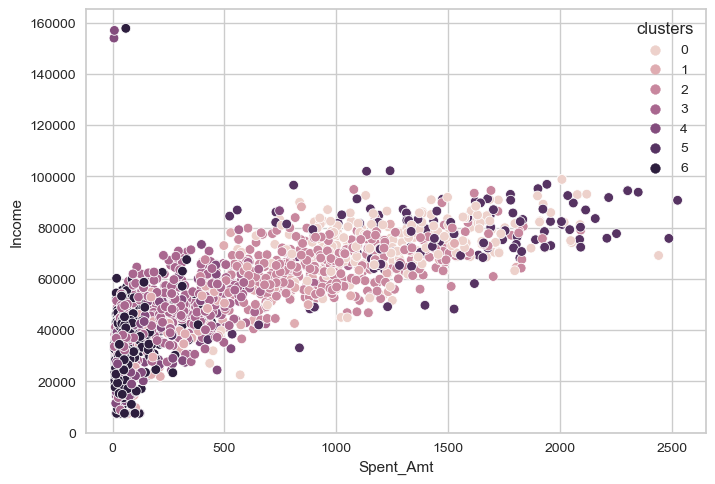

In [94]:
sns.scatterplot(x="Spent_Amt",data=data1,y="Income",hue="clusters")


## observation:
    From the above analysis we can see that the Amount spent by the customers increases as their income increases.

<Axes: xlabel='clusters', ylabel='Income'>

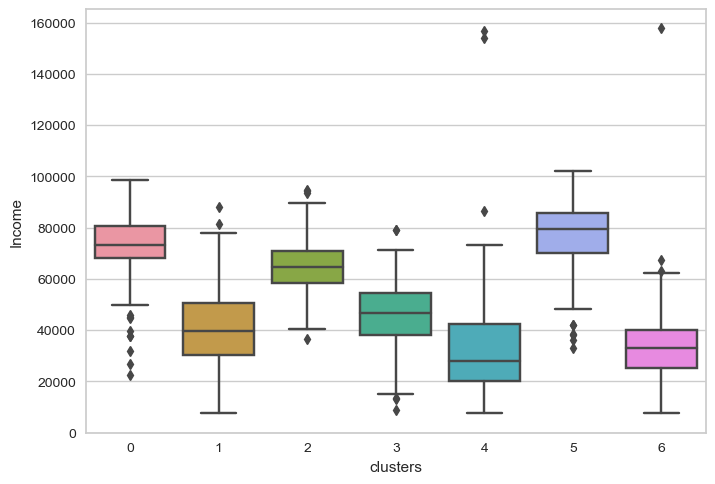

In [95]:
#To plot out the clusters by income
sns.boxplot(x="clusters",data=data1,y="Income")


## observation
clusters 2 and cluster 1 are low income earners clusters 4 are a mixture of low income earners and average income earners clusters 0 and cluster 5 are average income earners clusters 3 and cluster 6 are high income earners

<Axes: xlabel='clusters', ylabel='Spent_Amt'>

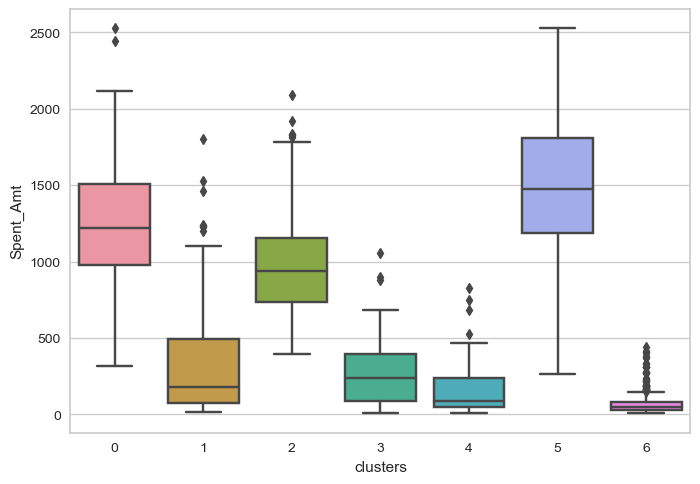

In [96]:
# To plot out the clusters by Amount Spent
sns.boxplot(x="clusters",data=data1,y="Spent_Amt")


## observations
cluster 4 and cluster 6 are low spenders
cluster 5 and cluster 0 are high spenders
cluster 3 are average spenders
cluster 1 and 2 are low and average spenders

Based on the observation of the income and amount spent by the customers from the two plots above, we can draw the following conclusions:

Cluster 6: High income earners but low income spenders. Cluster 5: Average income earners but high income spenders. Cluster 4: A mixture of low and average income earners, but they are the least income spenders. Cluster 3: High income earners but average income spenders. Clusters 1 and 2: Low income earners and low income spenders. Cluster 0: High income earners and high income spenders.

<Axes: xlabel='Education', ylabel='Wines'>

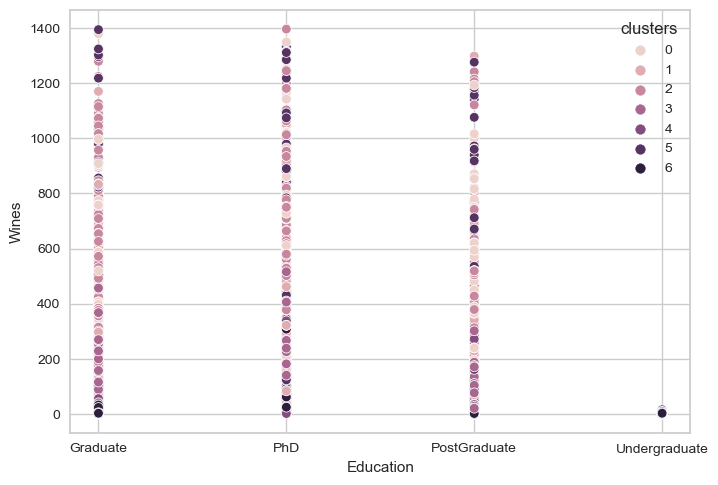

In [97]:
# Multivariate analysis of Education,Wines and Clusters

sns.scatterplot(x="Education",data=data1,y="Wines",hue="clusters")


customers who are graduates and PhD holders purchased the most wines

<Axes: xlabel='Customer_For', ylabel='Spent_Amt'>

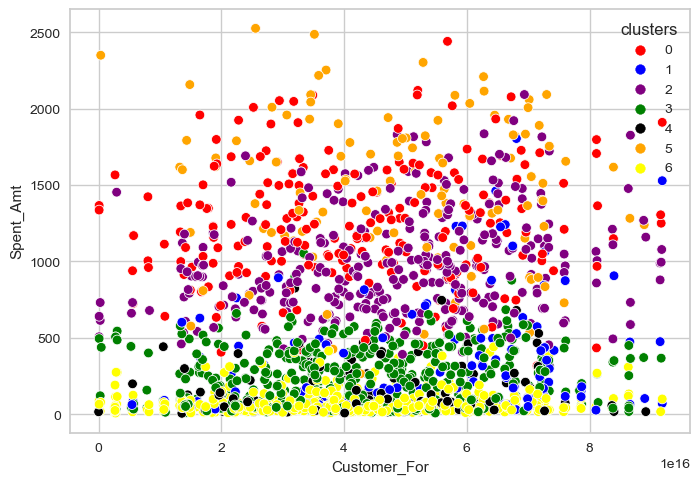

In [98]:
# Multivariate analysis of Customer_For,Spent_Amt and Clusters
cluster_colors = ["red","Blue","Purple","Green","Black","orange","yellow"]
sns.scatterplot(x="Customer_For",data=data1,y="Spent_Amt",hue="clusters", palette = cluster_colors)


Based on the data analysis, we can draw the following conclusions regarding the spending behavior of customers over different durations:

Customers who have been with the company from 1 year to 7 years tend to spend the most.

Clusters 4 and 6 consistently spend the least amount regardless of the duration of their customer relationship.

Cluster 1 typically spends less than $500, slightly above this amount.

Cluster 3 generally spends less than $1000, slightly above this threshold.

Cluster 0 and 5 tend to spend between  1000 𝑎𝑛𝑑 2000 and slightly above this amount.

<Axes: xlabel='Is_Parent', ylabel='Spent_Amt'>

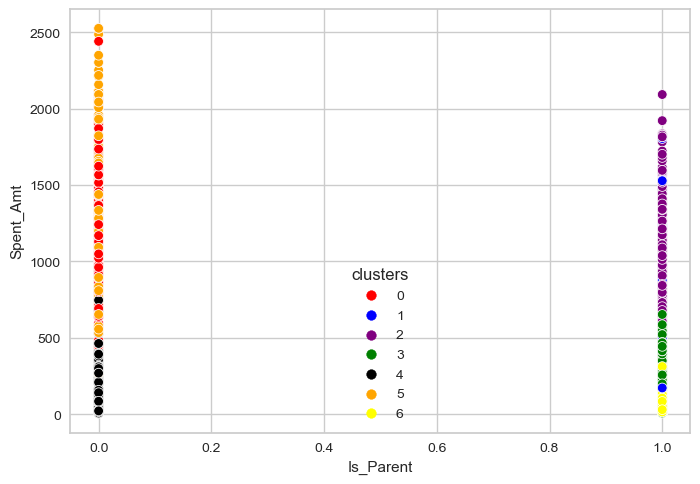

In [99]:
# Multivariate analysis of Is_Parent,Spent_Amt and Cluster
cluster_colors = ["red","Blue","Purple","Green","Black","orange","yellow"]
sns.scatterplot(x="Is_Parent",data=data1,y="Spent_Amt",hue="clusters",palette=cluster_colors)


Based on the analysis, we can infer the spending patterns among different clusters, considering whether they are parents or not:

Clusters 6, 5, and 0, which consist of non-parents, tend to spend the most. Specifically, Cluster 6, although not parents, are the lowest spenders, typically spending less than $500.

Clusters 5 and 0 spend approximately between  500𝑎𝑛𝑑
 2500. On the other hand, Clusters 4, 2, 1, and 3, comprising parents, are among the lowest spenders.

Cluster 4 exhibits the lowest spending behavior, followed by Cluster 2.

Cluster 1 tends to spend slightly above $500.

Cluster 3 spends a bit more, ranging from slightly above  $500 𝑡𝑜 𝑎𝑟𝑜𝑢𝑛𝑑 $2000.

Based on the analysis, we can discern spending patterns among different clusters, taking into account whether they are parents or not:

Clusters 6, 5, and 0 (Non-Parents):

These clusters exhibit the highest spending tendencies.
Specifically, Cluster 6, despite not being parents, tends to be the leest spender, typically spending less than $500.
Clusters 5 and 0 (Non-Parents):

Their spending falls within the range of 500 𝑡𝑜 2500.
Clusters 4, 2, 1, and 3 (Parents):

These clusters are among the lowest spenders.
Cluster Insights:

Cluster 4: Demonstrates the lowest spending behavior.

Cluster 2: Follows closely as another low spender.

Cluster 1: Tends to spend slightly above $500.

Cluster 3: Spends a bit more, ranging from slightly above $500 𝑡𝑜 𝑎𝑟𝑜𝑢𝑛𝑑 $2000.

<Axes: xlabel='Customer_agegroup', ylabel='Income'>

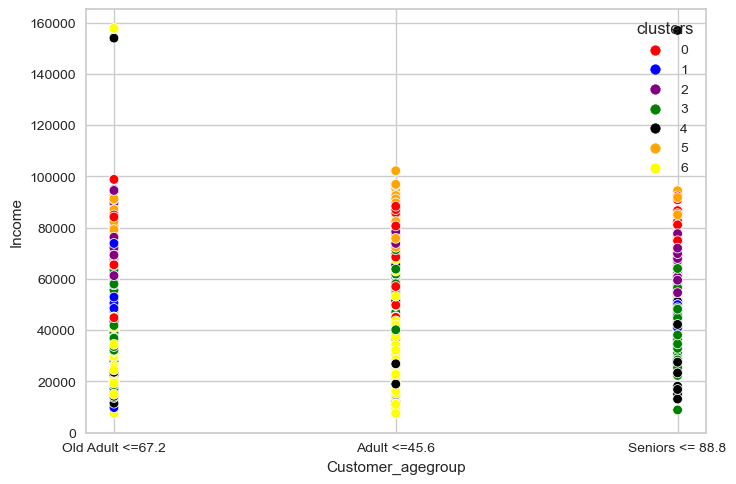

In [100]:
# Multivariate analysis of Is_Parent,Spent_Amt and Cluster
cluster_colors = ["red","Blue","Purple","Green","Black","orange","yellow"]
sns.scatterplot(x="Customer_agegroup",data=data1,y="Income",hue="clusters",palette=cluster_colors)


Based on the analysis, it is observed that the customer age group categorized as Adults (age <= 45.6 years) tends to generate the highest income across all clusters. Following this, the age group categorized as Old Adults (age <= 67.2 years) represents the second-highest income bracket.

Conversely, the customer age group classified as Seniors (age <= 88.8 years) demonstrates the lowest income generation among all age categories.

<Axes: >

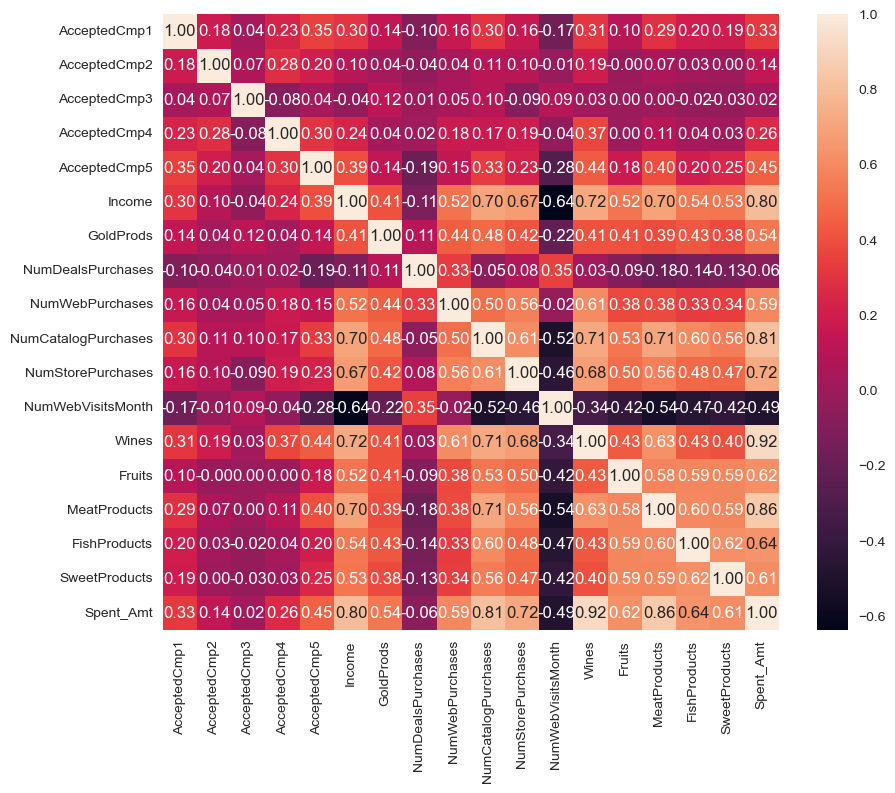

In [102]:
#ANALYSING CORRELATION BETWEEN THESE FEATURES

selected_columns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',"Income",'GoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','Wines', 'Fruits', 'MeatProducts',
       'FishProducts', 'SweetProducts','Spent_Amt']
selected_data = data1[selected_columns]
corr_matrix = selected_data.corr()
#print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,square=True,fmt=".2f")

Observation Report: Upon analyzing the provided plot, the following observations are noted:

Accepted Campaigns Contribution:

AcceptedCmp1 contributed to 33% of the Amount Spent and exhibited a positive relationship with NumWebPurchases (16%).

AcceptedCmp2 generated 14% of the Amount Spent, positively correlating with NewWebPurchases (4%).

AcceptedCmp3 generated a mere 2% of the Amount Spent, with a positive correlation observed with NumWebPurchases (5%).

AcceptedCmp4 made an 26% Amount Spent contribution, showing a positive relation with NewWebPurchases (18%).

AcceptedCmp5 was the most impactful, generating 45% of the Amount Spent, and demonstrating a positive correlation with NewWebPurchases (15%).

Notably, AcceptedCampaign 3 displayed the least performance among the campaigns.

GoldProds Impact: GoldProds significantly contributed, generating 54% of the Amount Spent.

GoldProds displayed a positive relationship with the number of store purchases (42%), number of catalog purchases (48%), and new web visits per month (22%).

NumDealsPurchases Influence: NumDealsPurchases had a negative impact, resulting in a -6% contribution to Amount Spent. This implies a negative correlation with the number of purchases made with a discount.

NumWebPurchases Contribution: NumWebPurchases had a substantial impact, contributing 59% to the Amount Spent.

NumCatalogPurchases Significance: NumCatalogPurchases showed a strong contribution, generating 81% of the Amount Spent. However, it exhibited a strong negative correlation (52%) with the Number of web visits per month.

NumStorePurchases and Relations:

NumStorePurchases played a crucial role, contributing 72% to the Amount Spent. It had a strong positive correlation (61%) with the number of catalog purchases and the number of web purchases. Conversely, NumStorePurchases exhibited a strong negative correlation (-45%) with the Number of web visits per month.

NumWebVisitsMonth and Its Impact: NumWebVisitsMonth displayed a strong negative correlation (-49%) with Amount Spent. This suggests that as the number of web visits per month increases, Amount Spent tends to decrease.

These findings provide valuable insights into the contributions and relationships between various factors, aiding in the identification of key drivers and areas for improvement in the company's marketing and sales strategies.


